In [1]:
import pandas as pd

# Example: all your results in a list of dicts
data = [
    # Vietnam 1989
    {"Country": "Vietnam", "Year": 1989, "Sample": 1, "True_Risk": 37593, "SUDA_Score": 54996},
    {"Country": "Vietnam", "Year": 1989, "Sample": 2, "True_Risk": 37593, "SUDA_Score": 54673},

    # Vietnam 2019
    {"Country": "Vietnam", "Year": 2019, "Sample": 1, "True_Risk": 30844, "SUDA_Score": 32847},
    {"Country": "Vietnam", "Year": 2019, "Sample": 2, "True_Risk": 30844, "SUDA_Score": 32943},

    # Dominican Republic 1981
    {"Country": "Dominican Republic", "Year": 1981, "Sample": 1, "True_Risk": 46454, "SUDA_Score": 29898},
    {"Country": "Dominican Republic", "Year": 1981, "Sample": 2, "True_Risk": 46454, "SUDA_Score": 29937},

    # Dominican Republic 2010
    {"Country": "Dominican Republic", "Year": 2010, "Sample": 1, "True_Risk": 79192, "SUDA_Score": 57945},
    {"Country": "Dominican Republic", "Year": 2010, "Sample": 2, "True_Risk": 79192, "SUDA_Score": 57982},

    # Hungary 1980
    {"Country": "Hungary", "Year": 1980, "Sample": 1, "True_Risk": 24405, "SUDA_Score": 28952},
    {"Country": "Hungary", "Year": 1980, "Sample": 2, "True_Risk": 24405, "SUDA_Score": 29140},

    # Hungary 2011
    {"Country": "Hungary", "Year": 2011, "Sample": 1, "True_Risk": 43974, "SUDA_Score": 34921},
    {"Country": "Hungary", "Year": 2011, "Sample": 2, "True_Risk": 43974, "SUDA_Score": 35185},

    # Switzerland 1980
    {"Country": "Switzerland", "Year": 1980, "Sample": 1, "True_Risk": 42760, "SUDA_Score": 30615},
    {"Country": "Switzerland", "Year": 1980, "Sample": 2, "True_Risk": 42760, "SUDA_Score": 30580},

    # Switzerland 2011
    {"Country": "Switzerland", "Year": 2011, "Sample": 1, "True_Risk": 19006, "SUDA_Score": 16690},
    {"Country": "Switzerland", "Year": 2011, "Sample": 2, "True_Risk": 19006, "SUDA_Score": 17066},
]

# Create DataFrame
df = pd.DataFrame(data)

# Calculate error % for each row
df["Error_%"] = ((df["SUDA_Score"] - df["True_Risk"]) / df["True_Risk"]) * 100

# Save for later use
df.to_csv("risk_comparison.csv", index=False)

print(df)

               Country  Year  Sample  True_Risk  SUDA_Score    Error_%
0              Vietnam  1989       1      37593       54996  46.293193
1              Vietnam  1989       2      37593       54673  45.433990
2              Vietnam  2019       1      30844       32847   6.493970
3              Vietnam  2019       2      30844       32943   6.805213
4   Dominican Republic  1981       1      46454       29898 -35.639557
5   Dominican Republic  1981       2      46454       29937 -35.555603
6   Dominican Republic  2010       1      79192       57945 -26.829730
7   Dominican Republic  2010       2      79192       57982 -26.783008
8              Hungary  1980       1      24405       28952  18.631428
9              Hungary  1980       2      24405       29140  19.401762
10             Hungary  2011       1      43974       34921 -20.587165
11             Hungary  2011       2      43974       35185 -19.986810
12         Switzerland  1980       1      42760       30615 -28.402713
13    

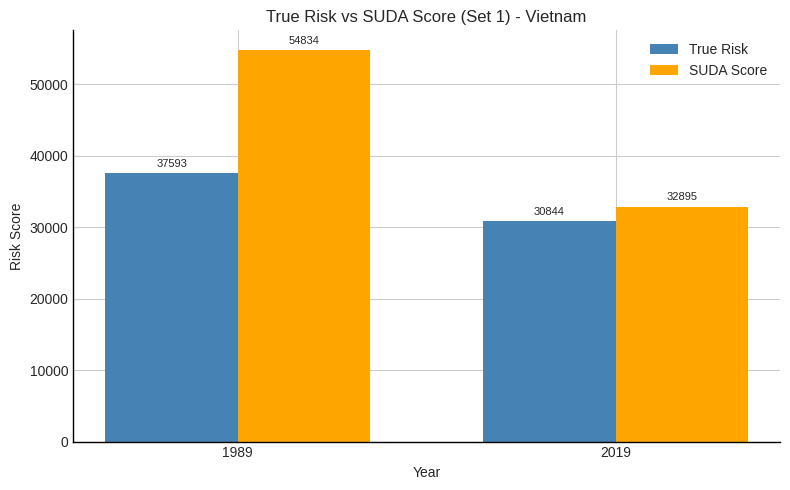

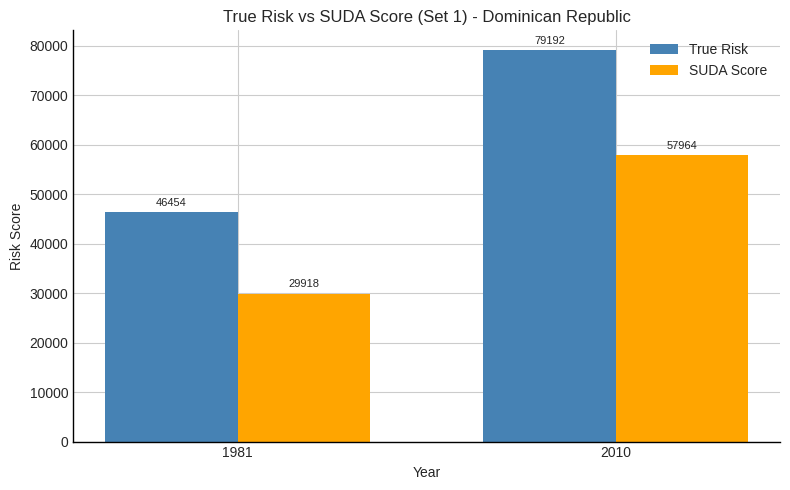

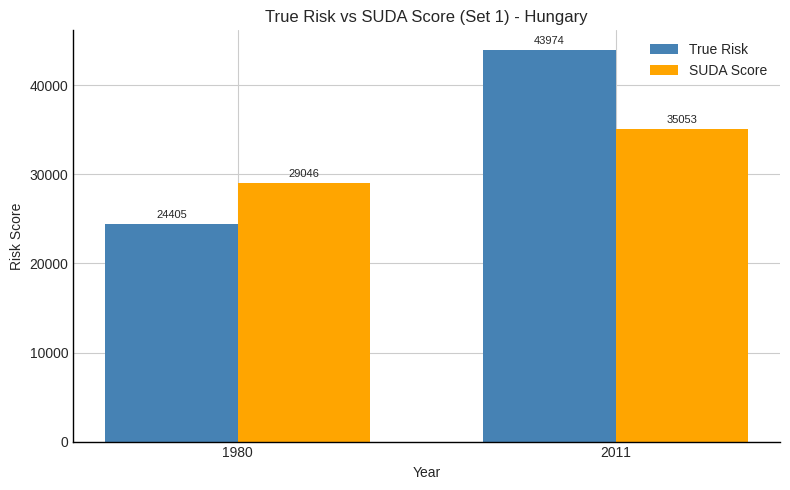

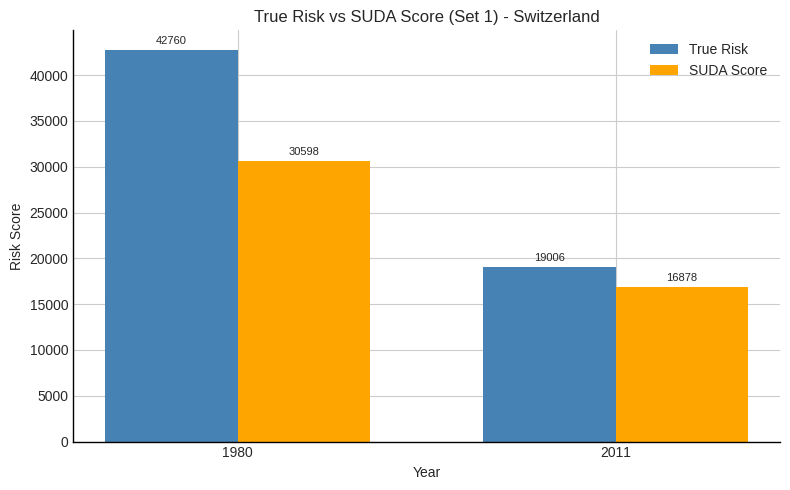

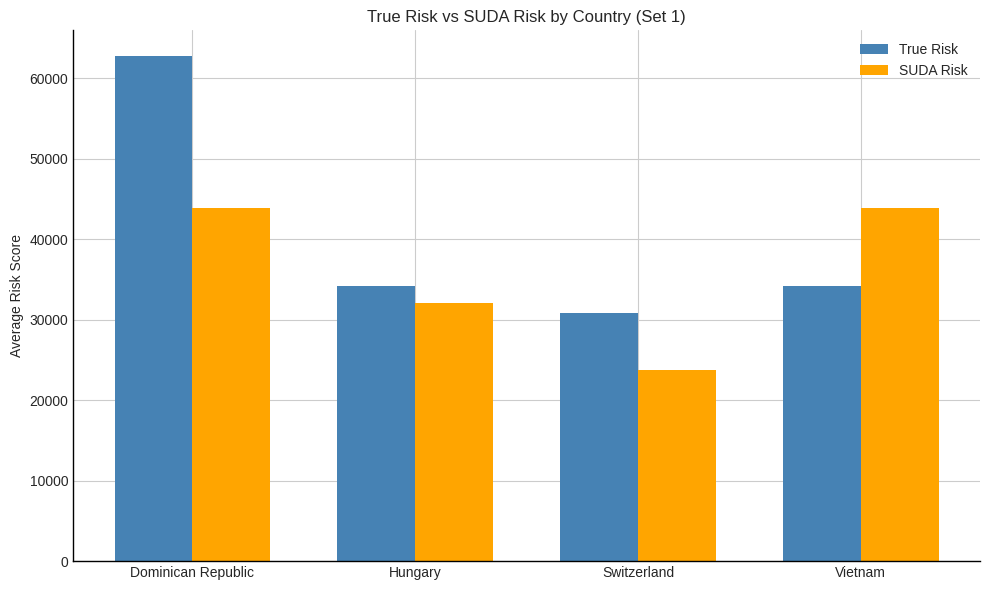

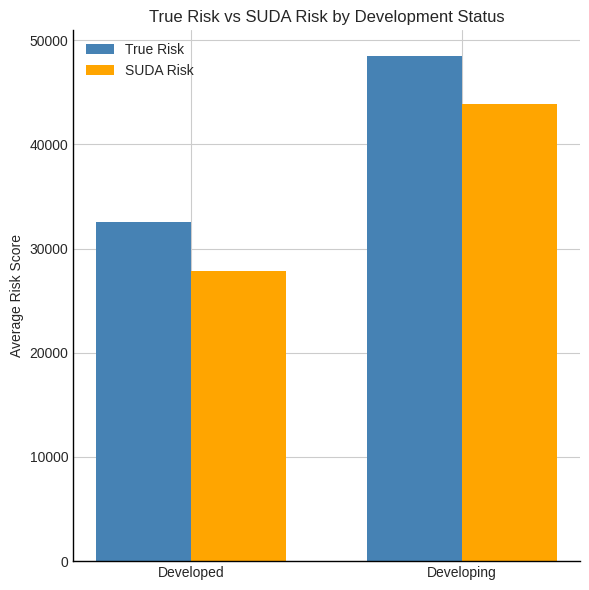

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Global Plotting Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "black",
    "axes.linewidth": 1,
    "font.size": 10
})

# Load Data
df = pd.read_csv("risk_comparison.csv")

# Plot Time Series (Grouped Bar by Country)
countries = df["Country"].unique()

for country in countries:
    subset = df[df["Country"] == country]

    years = sorted(subset["Year"].unique())
    true_scores = [subset[subset["Year"] == y]["True_Risk"].mean() for y in years]
    suda_scores = [subset[subset["Year"] == y]["SUDA_Score"].mean() for y in years]

    x = np.arange(len(years))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, true_scores, width, label='True Risk', color='steelblue')
    bars2 = ax.bar(x + width/2, suda_scores, width, label='SUDA Score', color='orange')

    ax.set_xlabel("Year")
    ax.set_ylabel("Risk Score")
    ax.set_title(f"True Risk vs SUDA Score (Set 1) - {country}")
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.legend()

    # Add value labels on top of bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Country-Level and Development-Level Averages (Raw Values)
country_summary = df.groupby("Country").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()

# Define developed vs developing countries
developed = ["Hungary", "Switzerland"]
df["Development_Status"] = df["Country"].apply(
    lambda x: "Developed" if x in developed else "Developing"
)

dev_summary = df.groupby("Development_Status").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()


# Visualisation 1: Country-Level Bar Chart (Raw Values)
plt.figure(figsize=(10, 6))
x = range(len(country_summary))
width = 0.35

plt.bar([i - width/2 for i in x], country_summary["Avg_True_Risk"], width,
        label="True Risk", color="steelblue")
plt.bar([i + width/2 for i in x], country_summary["Avg_SUDA_Risk"], width,
        label="SUDA Risk", color="orange")

plt.xticks(ticks=x, labels=country_summary["Country"])
plt.ylabel("Average Risk Score")
plt.title("True Risk vs SUDA Risk by Country (Set 1)")
plt.legend()
plt.tight_layout()
plt.show()


# Visualisation 2: Development Status Bar Chart (Raw Values)
plt.figure(figsize=(6, 6))
x = range(len(dev_summary))

plt.bar([i - width/2 for i in x], dev_summary["Avg_True_Risk"], width,
        label="True Risk", color="steelblue")
plt.bar([i + width/2 for i in x], dev_summary["Avg_SUDA_Risk"], width,
        label="SUDA Risk", color="orange")

plt.xticks(ticks=x, labels=dev_summary["Development_Status"])
plt.ylabel("Average Risk Score")
plt.title("True Risk vs SUDA Risk by Development Status")
plt.legend()
plt.tight_layout()
plt.show()


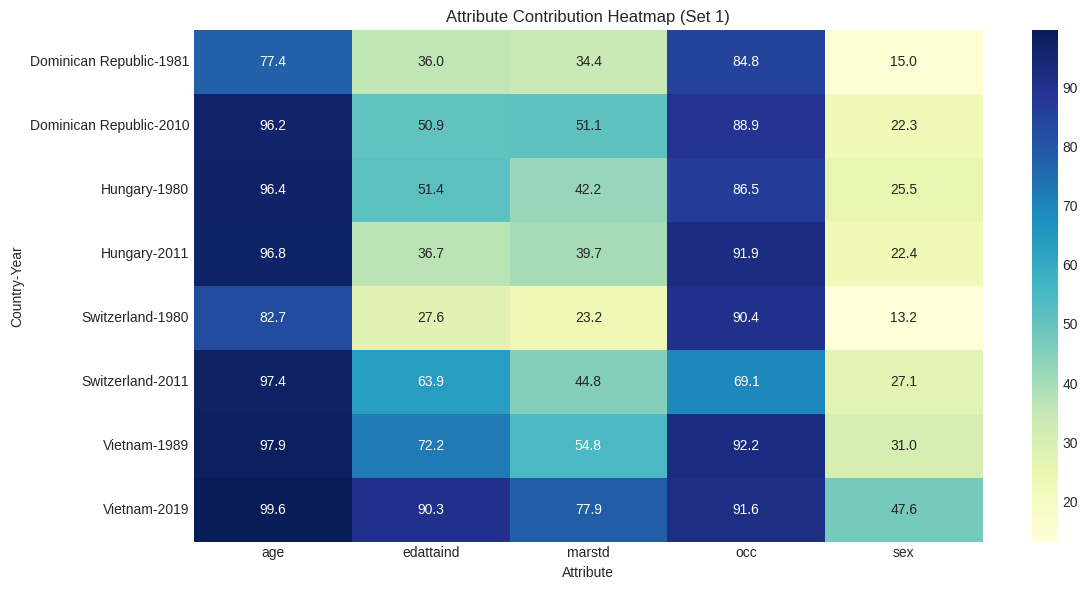

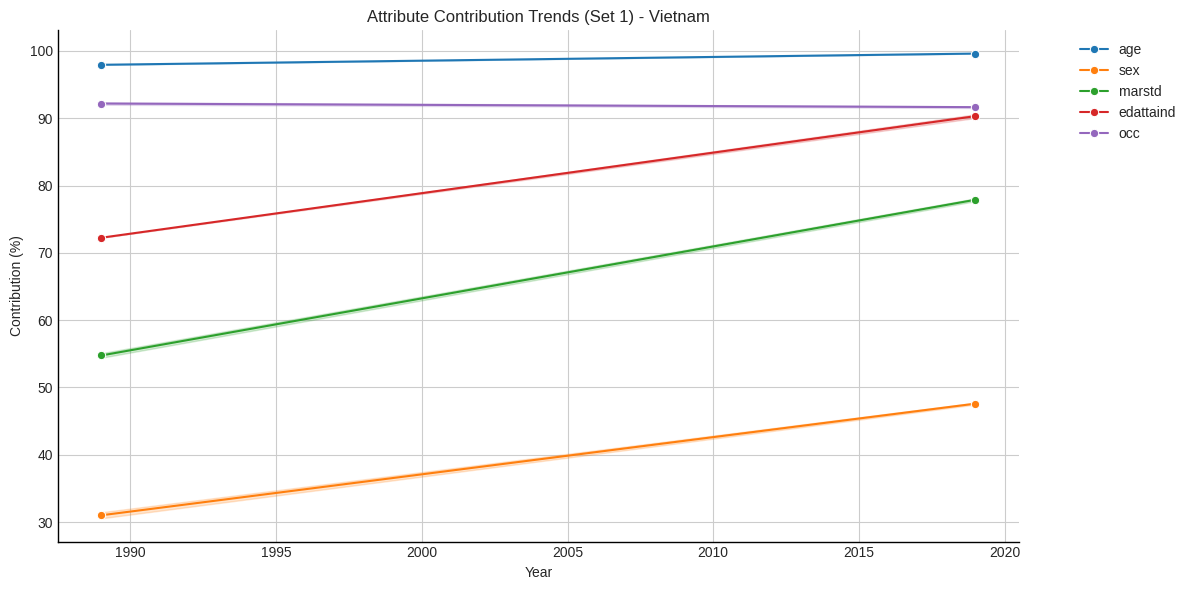

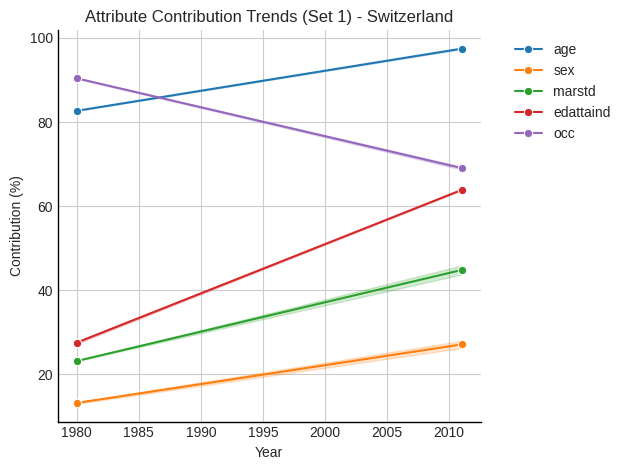

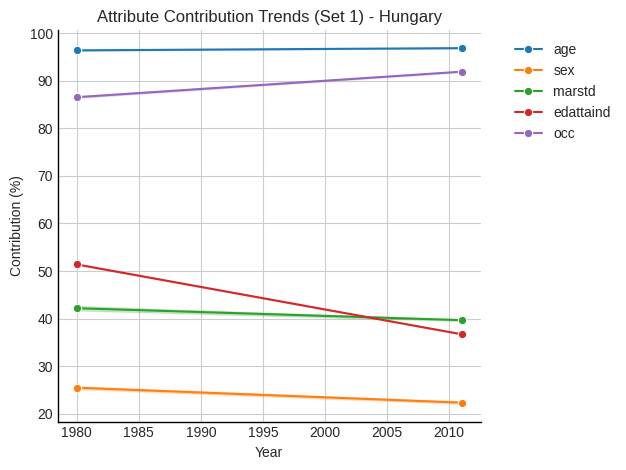

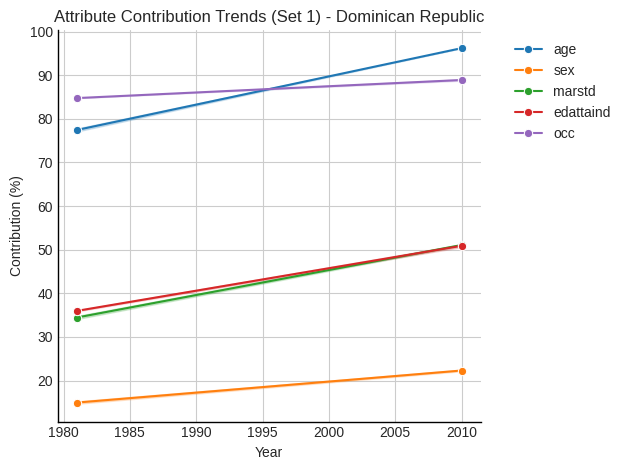

/tmp/ipython-input-3390459832.py:136: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=msu_data, x="Year", y="Count", hue="MSU_Size", ci=None)


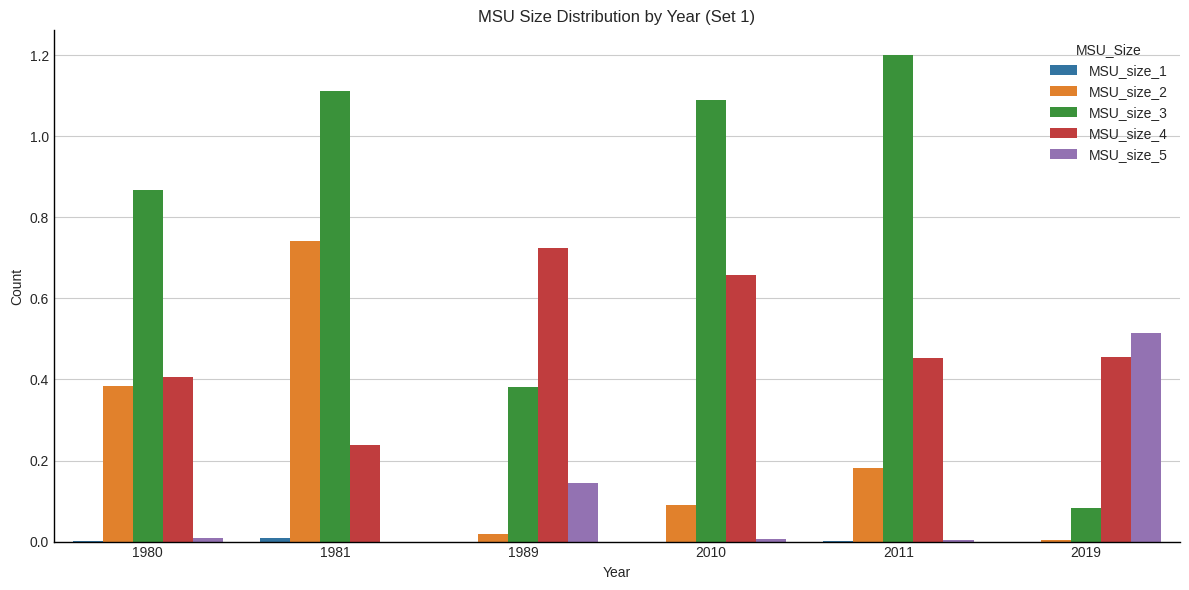

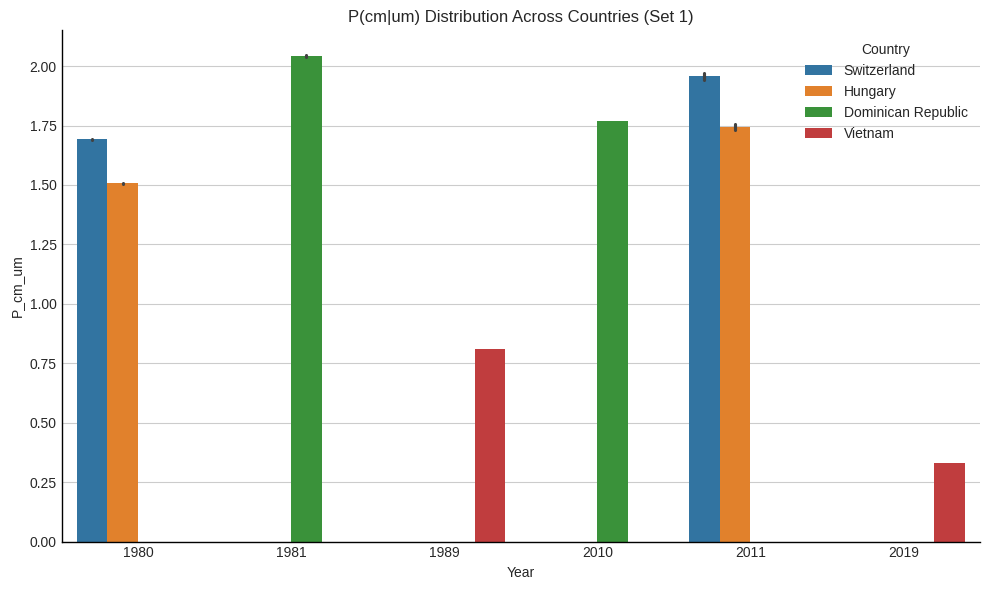

In [9]:
import re
import seaborn as sns
import glob

#Read Attribute Contribution Files
def parse_attr_contrib(file_path):
    """
    Reads an attribute contribution text file and returns a DataFrame with Country, Year, Sample, Attribute, Contribution%.
    """
    # Extract country, year, sample from filename
    match = re.search(r"(s\d)_([a-z]{1,2})(\d{4})_attribute_contrib", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame() # Return empty DataFrame for unmatched files

    country_map = {'v': 'Vietnam', 'dr': 'Dominican Republic', 'h': 'Hungary', 's': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code) if country_code else None

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()


    rows = []
    with open(file_path, 'r') as f:
        for line in f:
            match_attr = re.match(r"col#\d+\s+att\s+'(.+)'\s+percentage contribution\s+([\d.]+)", line.strip())
            if match_attr:
                attribute = match_attr.group(1)
                contrib = float(match_attr.group(2))
                rows.append({"Country": country, "Year": year, "Sample": sample,
                             "Attribute": attribute, "Contribution_%": contrib})
    return pd.DataFrame(rows)

attr_files = glob.glob("*_attribute_contrib.txt")
attr_df = pd.concat([parse_attr_contrib(f) for f in attr_files], ignore_index=True)


#Read Records CSV Files
records_files = glob.glob("*_records.csv")
records_dfs = []
for f in records_files:
    match = re.search(r"(s\d)_([a-z]{1,2})(\d{4})_records", f, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {f}")
        continue # Skip this file if filename doesn't match

    country_map = {'v': 'Vietnam', 'dr': 'Dominican Republic', 'h': 'Hungary', 's': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code) if country_code else None

    if country is None:
         print(f"Warning: Could not determine country for file: {f}")
         continue


    df_temp = pd.read_csv(f)
    df_temp["Country"] = country
    df_temp["Year"] = year
    df_temp["Sample"] = sample
    records_dfs.append(df_temp)

records_df = pd.concat(records_dfs, ignore_index=True)


#Read Summary TXT Files
def parse_summary(file_path):
    """
    Reads a SUDA summary text file and extracts P(cm|um) and Sample Unique count.
    """
    match = re.search(r"(s\d)_([a-z]{1,2})(\d{4})_summary", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame() # Return empty DataFrame for unmatched files

    country_map = {'v': 'Vietnam', 'dr': 'Dominican Republic', 'h': 'Hungary', 's': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code) if country_code else None

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()


    p_cm_um, sample_uniques = None, None
    with open(file_path, 'r') as f:
        for line in f:
            if "P(cm|um)" in line:
                p_cm_um = float(line.split("=")[1].strip())
            if "Sample Unique records" in line:
                sample_uniques = int(line.split()[-1])

    return pd.DataFrame([{"Country": country, "Year": year, "Sample": sample,
                          "P_cm_um": p_cm_um, "Sample_Uniques": sample_uniques}])

summary_files = glob.glob("*_summary.txt")
summary_df = pd.concat([parse_summary(f) for f in summary_files], ignore_index=True)


#Visualizations

# 1. Attribute Contribution Heatmap
heatmap_data = attr_df.pivot_table(index=["Country", "Year"], columns="Attribute", values="Contribution_%", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Attribute Contribution Heatmap (Set 1)")
plt.tight_layout()
plt.show()

# 2. Attribute Contribution Trends Over Time
plt.figure(figsize=(12, 6))
for country in attr_df["Country"].unique():
    subset = attr_df[attr_df["Country"] == country]
    sns.lineplot(data=subset, x="Year", y="Contribution_%", hue="Attribute", marker="o")
    plt.title(f"Attribute Contribution Trends (Set 1) - {country}")
    plt.ylabel("Contribution (%)")
    plt.xlabel("Year")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 3. MSU Size Distribution
msu_cols = [col for col in records_df.columns if col.startswith("MSU_size_")]
msu_data = records_df.melt(id_vars=["Country", "Year", "Sample"], value_vars=msu_cols, var_name="MSU_Size", value_name="Count")
plt.figure(figsize=(12, 6))
sns.barplot(data=msu_data, x="Year", y="Count", hue="MSU_Size", ci=None)
plt.title("MSU Size Distribution by Year (Set 1)")
plt.tight_layout()
plt.show()

# 4. P(cm|um) Distribution Across Countries
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Year", y="P_cm_um", hue="Country")
plt.title("P(cm|um) Distribution Across Countries (Set 1)")
plt.tight_layout()
plt.show()

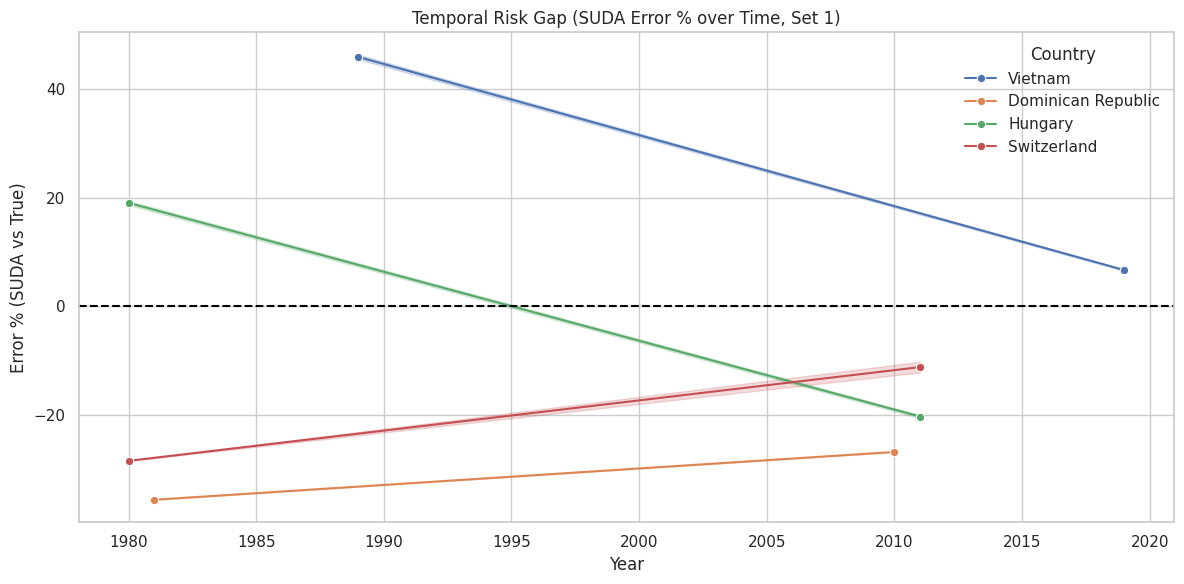

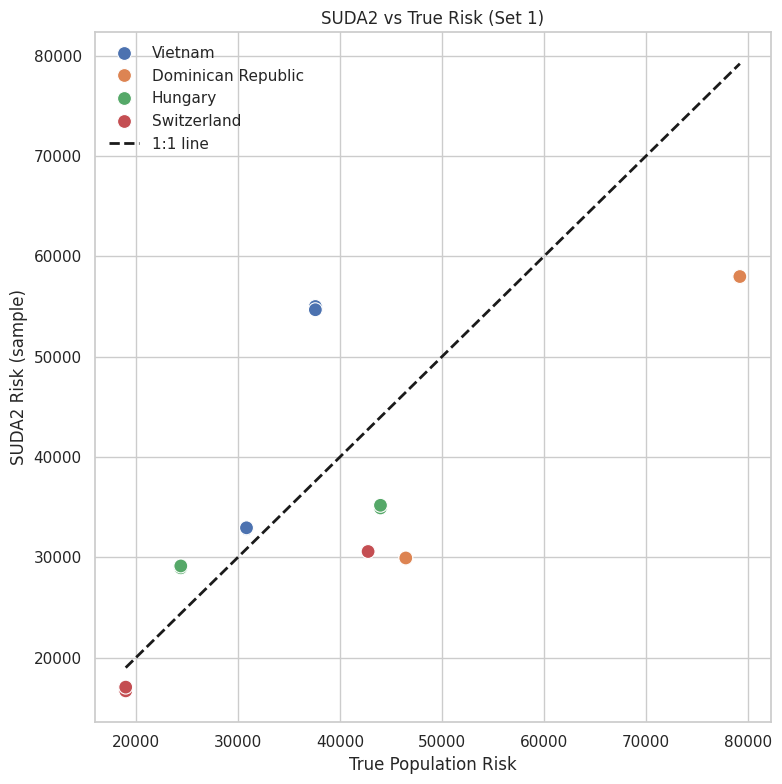

In [18]:
#Averages

#Country-level averages
country_summary = df.groupby("Country").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()

#Developed vs Developing classification
developed = ["Hungary", "Switzerland"]
developing = ["Vietnam", "DR"]

df["Development_Status"] = df["Country"].apply(lambda x: "Developed" if x in developed else "Developing")

#Averages by Development Status
dev_summary = df.groupby("Development_Status").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()

#Save summaries
country_summary.to_csv("country_risk_summary.csv", index=False)
dev_summary.to_csv("dev_status_summary.csv", index=False)

#Load True Risk CSV
true_risk_df = pd.read_csv("risk_comparison.csv")

# Merge true_risk_df with summary_df to get full context if needed
risk_profile_df = true_risk_df.merge(summary_df, left_on=["Country", "Year", "Sample"], right_on=["country", "year", "sample"], how="left")

# Define hue order for consistency
country_order = risk_profile_df["Country"].unique()

# 5. Temporal Risk Gap (Error % Over Time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=risk_profile_df, x="Year", y="Error_%", hue="Country", marker="o")
plt.axhline(0, color="black", linestyle="--")
plt.title("Temporal Risk Gap (SUDA Error % over Time, Set 1)")
plt.ylabel("Error % (SUDA vs True)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# 6. Scatter Plot: SUDA2 vs. True Risk with 1:1 line
plt.figure(figsize=(8, 8))
sns.scatterplot(data=risk_profile_df, x="True_Risk", y="SUDA_Score", hue="Country", s=100)
plt.plot([risk_profile_df["True_Risk"].min(), risk_profile_df["True_Risk"].max()],
         [risk_profile_df["True_Risk"].min(), risk_profile_df["True_Risk"].max()],
         'k--', lw=2, label='1:1 line') # Add 1:1 line
plt.title("SUDA2 vs True Risk (Set 1)")
plt.xlabel("True Population Risk")
plt.ylabel("SUDA2 Risk (sample)")
plt.legend()
plt.tight_layout()
plt.show()

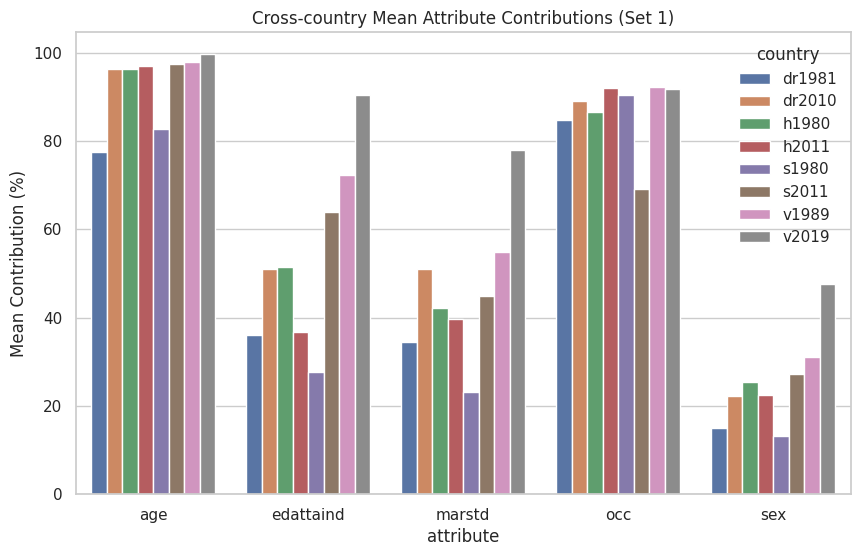

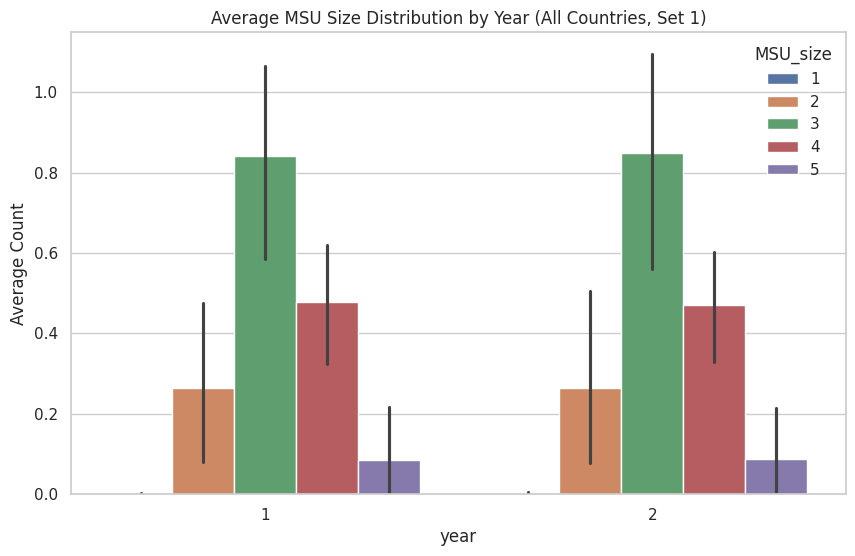

In [19]:
from glob import glob

sns.set(style="whitegrid")

#Parse Attribute Contributions
attr_dfs = []
for file in glob("*_attribute_contrib.txt"):
    # Extract country, year, sample from filename (assuming pattern like s1_v1989_attribute_contrib.txt)
    parts = file.split("_")
    sample = parts[0]  # s1
    country_code = parts[1]  # v
    year = re.findall(r'\d+', parts[1] + parts[2])[0] if len(parts) > 2 else re.findall(r'\d+', parts[1])[0]

    country_map = {"v": "Vietnam", "dr": "Dominican Republic", "h": "Hungary", "s": "Switzerland"}
    country = country_map.get(country_code.lower(), country_code)

    rows = []
    with open(file, "r") as f:
        for line in f:
            match = re.search(r"att\s+'(.+?)'\s+percentage contribution\s+([\d.]+)", line)
            if match:
                attribute = match.group(1)
                contribution = float(match.group(2))
                rows.append({"country": country, "year": int(year), "attribute": attribute, "contribution": contribution, "sample": sample})

    attr_dfs.append(pd.DataFrame(rows))

attr_df = pd.concat(attr_dfs)

#Average contributions over samples
attr_avg = attr_df.groupby(["country", "year", "attribute"])["contribution"].mean().reset_index()

#Parse Records CSVs
records_dfs = []
for file in glob("*_records.csv"):
    parts = file.split("_")
    sample = parts[0]
    country_code = parts[1]
    year = re.findall(r'\d+', file)[0]
    country = country_map.get(country_code.lower(), country_code)

    df_rec = pd.read_csv(file)
    df_rec["country"] = country
    df_rec["year"] = int(year)
    df_rec["sample"] = sample
    records_dfs.append(df_rec)

records_df = pd.concat(records_dfs)

#Parse Summary TXT for P(cm|um)
summary_data = []
for file in glob("*_summary.txt"):
    parts = file.split("_")
    sample = parts[0]
    country_code = parts[1]
    year = re.findall(r'\d+', file)[0]
    country = country_map.get(country_code.lower(), country_code)

    with open(file, "r") as f:
        content = f.read()
        match_p = re.search(r"P\(cm\|um\)\s=\s([\d.]+)", content)
        if match_p:
            p_val = float(match_p.group(1))
            summary_data.append({"country": country, "year": int(year), "sample": sample, "P_cm_um": p_val})

summary_df = pd.DataFrame(summary_data)

#Visualisations

# 7. Cross-country Attribute Contribution Comparison
plt.figure(figsize=(10, 6))
cross_attr = attr_avg.groupby(["country", "attribute"])["contribution"].mean().reset_index()
sns.barplot(data=cross_attr, x="attribute", y="contribution", hue="country")
plt.title("Cross-country Mean Attribute Contributions (Set 1)")
plt.ylabel("Mean Contribution (%)")
plt.show()

# 8. MSU Size Distribution
msu_cols = [col for col in records_df.columns if col.startswith("MSU_size_")]
msu_long = records_df.melt(id_vars=["country", "year", "sample"], value_vars=msu_cols, var_name="MSU_size", value_name="count")
msu_long["MSU_size"] = msu_long["MSU_size"].str.replace("MSU_size_", "")
msu_grouped = msu_long.groupby(["country", "year", "MSU_size"])["count"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=msu_grouped, x="year", y="count", hue="MSU_size")
plt.title("Average MSU Size Distribution by Year (All Countries, Set 1)")
plt.ylabel("Average Count")
plt.show()


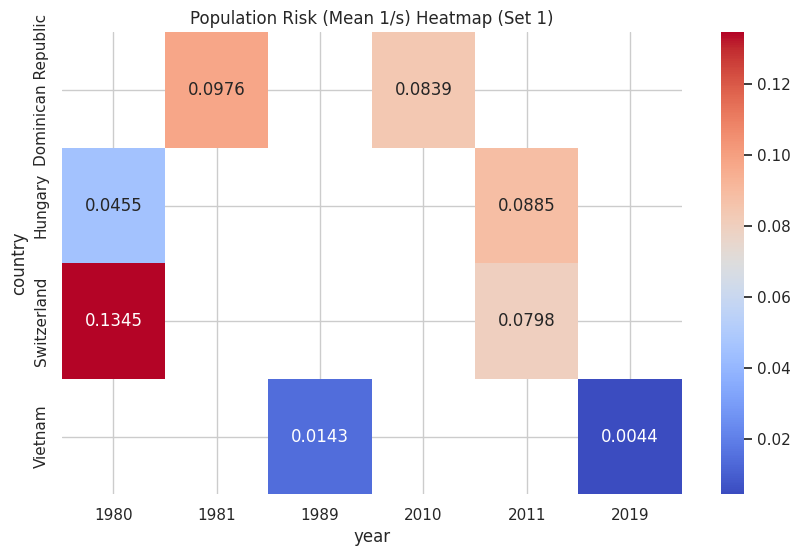

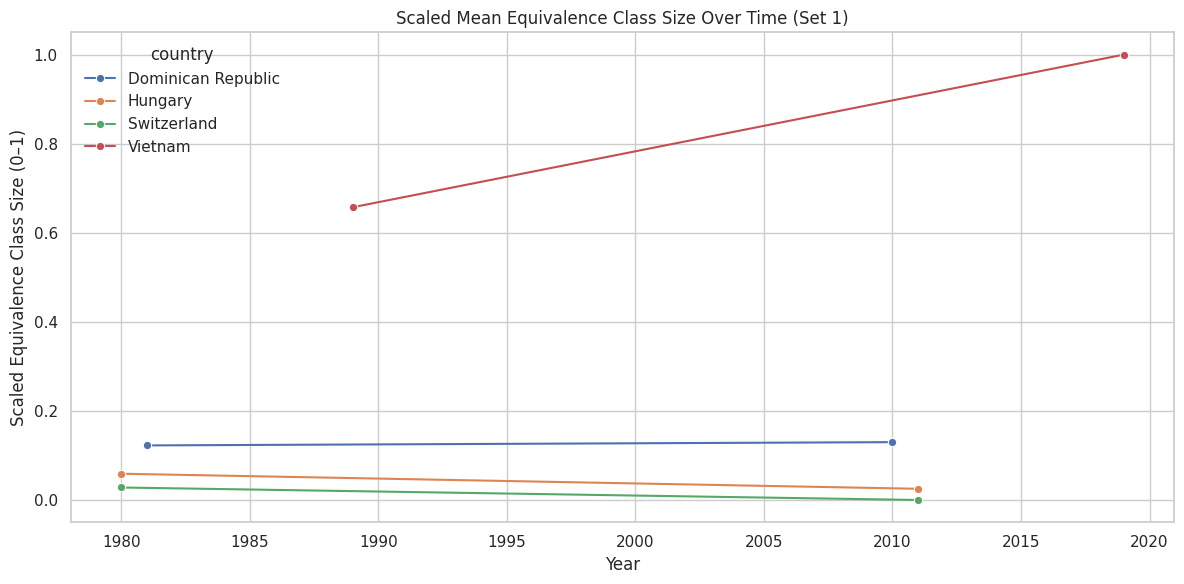

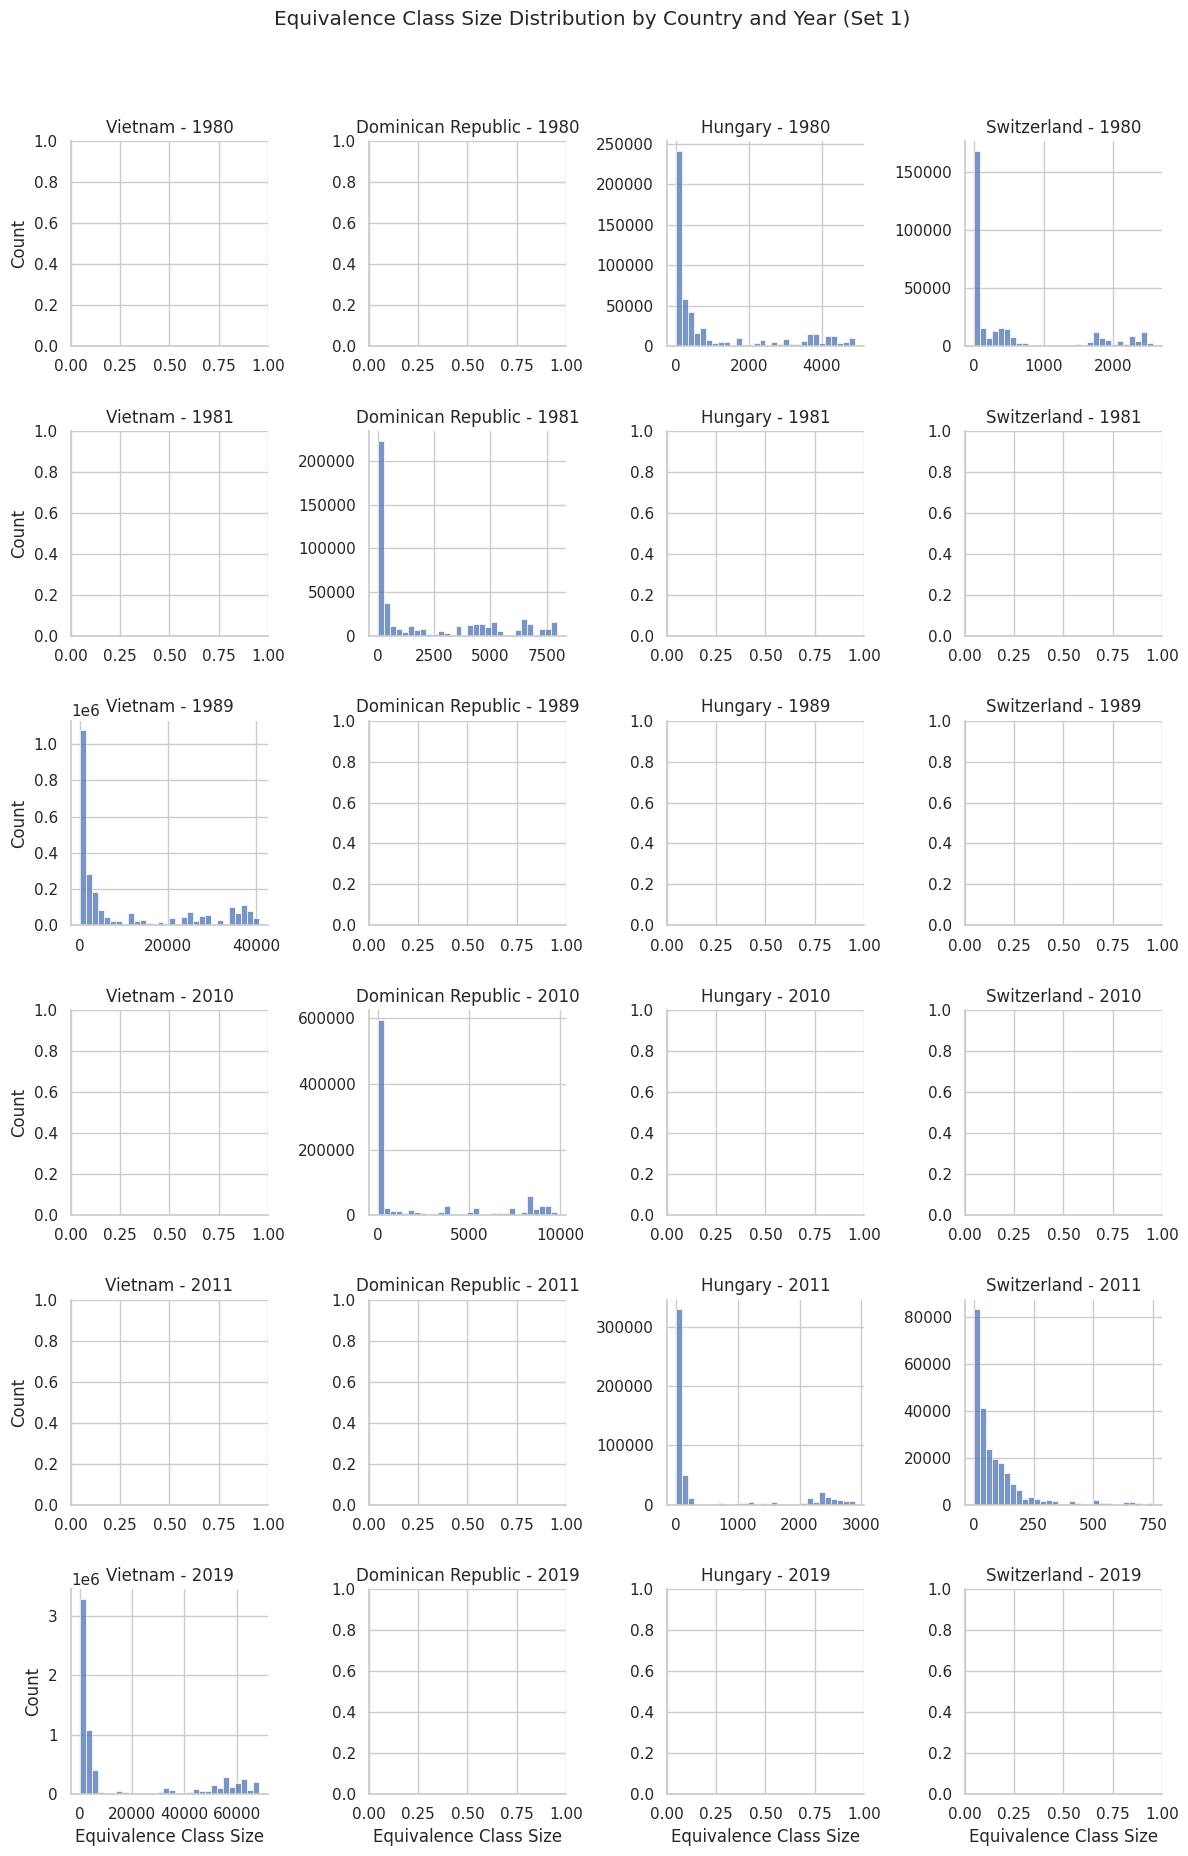

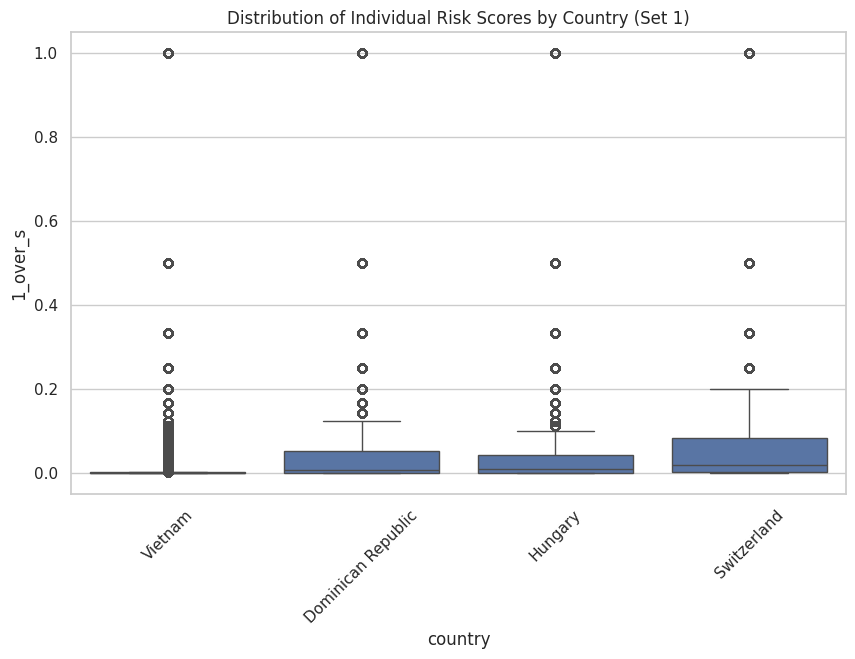

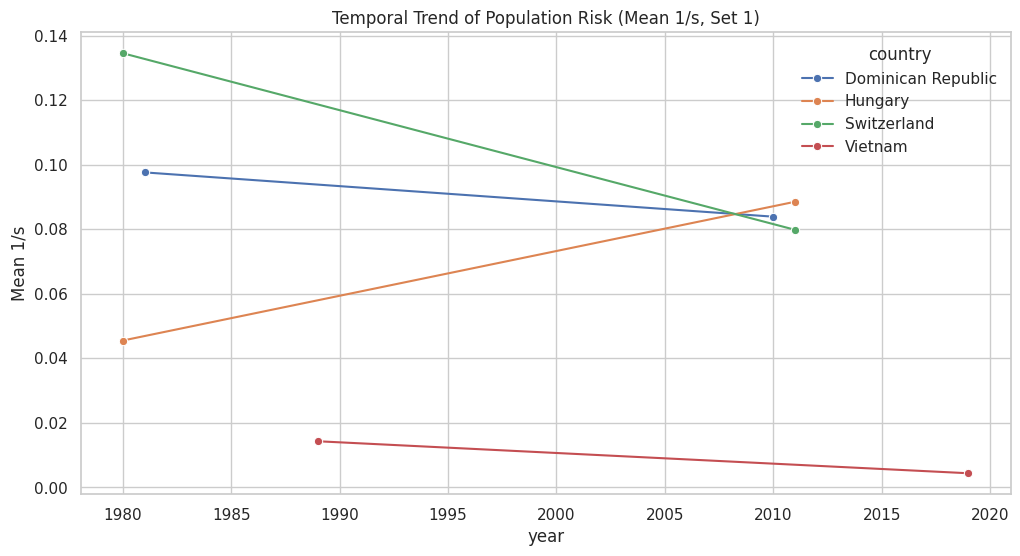

In [21]:
#File mapping and data load
file_map = {
    "vietnam1989.csv": ("Vietnam", 1989),
    "vietnam2019.csv": ("Vietnam", 2019),
    "dr1981.csv": ("Dominican Republic", 1981),
    "dr2010.csv": ("Dominican Republic", 2010),
    "hungary1980.csv": ("Hungary", 1980),
    "hungary2011.csv": ("Hungary", 2011),
    "swiss1980.csv": ("Switzerland", 1980),
    "swiss2011.csv": ("Switzerland", 2011),
}

key_vars = ["age", "sex", "marstd", "edattaind", "occ"]

dfs = []
for fname, (country, year) in file_map.items():
    df = pd.read_csv(fname)
    df["country"] = country
    df["year"] = year

    # Equivalence classes
    df["eq_class"] = df[key_vars].astype(str).agg("-".join, axis=1)
    eq_counts = df["eq_class"].value_counts()
    df["eq_class_size"] = df["eq_class"].map(eq_counts)
    df["1_over_s"] = 1 / df["eq_class_size"]

    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

#VISUALISATIONS

# 9. Heatmap of population risk (mean 1/s per country-year)
risk_summary = df_all.groupby(["country", "year"])["1_over_s"].mean().reset_index()
pivot_risk = risk_summary.pivot(index="country", columns="year", values="1_over_s")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_risk, annot=True, fmt=".4f", cmap="coolwarm")
plt.title("Population Risk (Mean 1/s) Heatmap (Set 1)")
plt.show()

# 10. Mean equivalence class size over time
#Mean equivalence class size over time (scaled 0–1)
trend_df = df_all.groupby(["country", "year"])["eq_class_size"].mean().reset_index()

# Min–max normalization
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())

trend_df["eq_class_size_scaled"] = minmax(trend_df["eq_class_size"])

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=trend_df,
    x="year", y="eq_class_size_scaled",
    hue="country", marker="o"
)
plt.title("Scaled Mean Equivalence Class Size Over Time (Set 1)")
plt.ylabel("Scaled Equivalence Class Size (0–1)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# 11. Equivalence Class Size Distributions (Histograms/Density plots)
# Plot distribution of equivalence class size for each country-year
g = sns.FacetGrid(df_all, col="country", row="year", sharex=False, sharey=False)
g.map(sns.histplot, "eq_class_size", bins=30)
g.fig.suptitle("Equivalence Class Size Distribution by Country and Year (Set 1)", y=1.03)
g.set_axis_labels("Equivalence Class Size", "Count")
g.set_titles("{col_name} - {row_name}")
plt.tight_layout()
plt.show()

# 12. Boxplot of individual risk by country
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x="country", y="1_over_s")
plt.title("Distribution of Individual Risk Scores by Country (Set 1)")
plt.xticks(rotation=45)
plt.show()

# 13. Temporal risk trend (avg 1/s)
plt.figure(figsize=(12,6))
sns.lineplot(data=risk_summary, x="year", y="1_over_s", hue="country", marker="o")
plt.title("Temporal Trend of Population Risk (Mean 1/s, Set 1)")
plt.ylabel("Mean 1/s")
plt.show()

In [22]:
def compare_distribution(pop_df, sample_df, column, bins=30):
    plt.figure(figsize=(8, 5))
    sns.histplot(pop_df[column], bins=bins, color="blue", stat="density", alpha=0.4, label="Population")
    sns.histplot(sample_df[column], bins=bins, color="red", stat="density", alpha=0.4, label="Sample")
    plt.title(f"Distribution Comparison: {column}")
    plt.legend()
    plt.show()

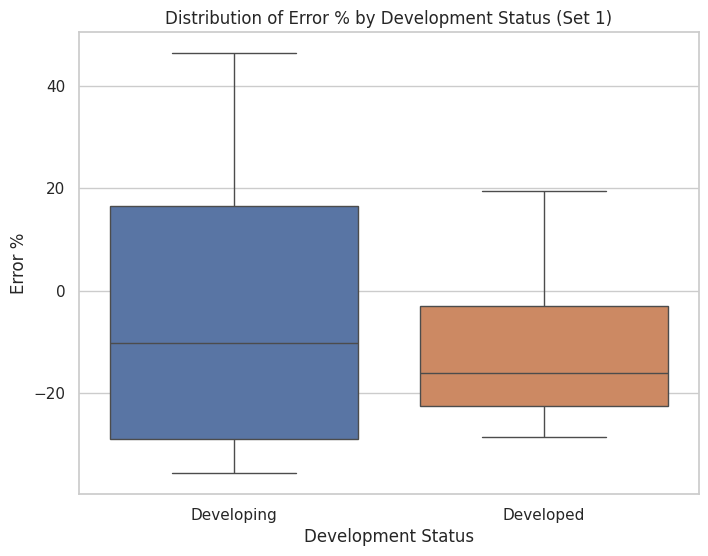

In [23]:
try:
    df_risk = pd.read_csv("risk_comparison.csv")
except FileNotFoundError:
    print("Error: risk_comparison.csv not found. Please upload the file.")
    exit()

# Define developed and developing countries
developed = ["Hungary", "Switzerland"]
developing = ["Vietnam", "Dominican Republic"]

# Add Development_Status column
df_risk["Development_Status"] = df_risk["Country"].apply(lambda x: "Developed" if x in developed else "Developing")

# 14. Grouped Boxplots (Developed vs Developing, Set 1)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_risk, x="Development_Status", y="Error_%", hue="Development_Status")
plt.title("Distribution of Error % by Development Status (Set 1)")
plt.ylabel("Error %")
plt.xlabel("Development Status")
plt.show()

/tmp/ipython-input-2416293454.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_error_df, x="Country_Year", y="Error_%", palette="coolwarm") # Using a diverging color palette


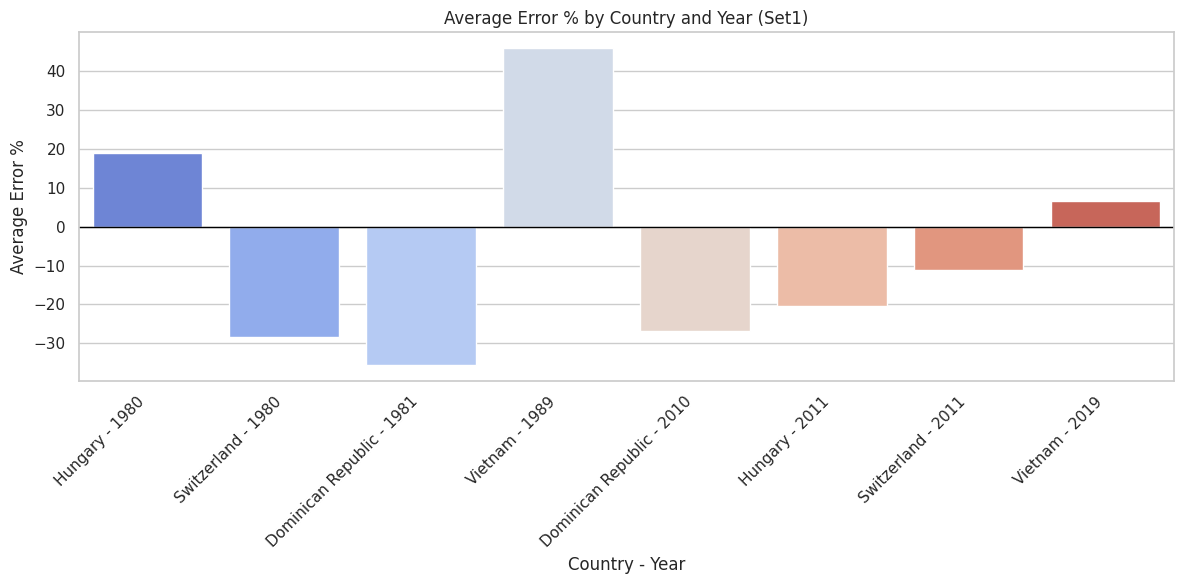

In [24]:
# Calculate average error % per country and year
avg_error_df = df_risk.groupby(["Country", "Year"])["Error_%"].mean().reset_index()

# Combine Country and Year for the x-axis label
avg_error_df["Country_Year"] = avg_error_df["Country"] + " - " + avg_error_df["Year"].astype(str)

# Sort by Year then Country for better visualization
avg_error_df = avg_error_df.sort_values(by=["Year", "Country"])

# 15. Bias Direction and Magnitude by Country-Year (Diverging Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_error_df, x="Country_Year", y="Error_%", palette="coolwarm") # Using a diverging color palette

plt.axhline(0, color='black', linewidth=1) # Add a horizontal line at 0 for reference
plt.ylabel("Average Error %")
plt.xlabel("Country - Year")
plt.title("Average Error % by Country and Year (Set1)")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [27]:
from glob import glob
import re

#Load and Inspect Risk Comparison Data
print("--- Risk Comparison Data (risk_comparison.csv) ---")
try:
    df_risk = pd.read_csv("risk_comparison.csv")
    display(df_risk.head())
    print("\nInfo:")
    display(df_risk.info())
    print("\nDescription:")
    display(df_risk.describe())
except FileNotFoundError:
    print("Error: risk_comparison.csv not found. Please upload the file.")
    df_risk = None # Set to None if file not found

#Load and Inspect Attribute Contribution Data
print("\n--- Attribute Contribution Data (*_attribute_contrib.txt) ---")
def parse_attr_contrib(file_path):
    """
    Reads an attribute contribution text file and returns a DataFrame with Country, Year, Sample, Attribute, Contribution%.
    """
    match = re.search(r"(s\d)_([a-z]{1,2})(\d{4})_attribute_contrib", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame()

    country_map = {'v': 'Vietnam', 'dr': 'Dominican Republic', 'h': 'Hungary', 's': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code)

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()

    rows = []
    with open(file_path, 'r') as f:
        for line in f:
            match_attr = re.match(r"col#\d+\s+att\s+'(.+)'\s+percentage contribution\s+([\d.]+)", line.strip())
            if match_attr:
                attribute = match_attr.group(1)
                contrib = float(match_attr.group(2))
                rows.append({"Country": country, "Year": year, "Sample": sample,
                             "Attribute": attribute, "Contribution_%": contrib})
    return pd.DataFrame(rows)

attr_files = glob("*_attribute_contrib.txt")
if attr_files:
    attr_df = pd.concat([parse_attr_contrib(f) for f in attr_files], ignore_index=True)
    print(f"Found {len(attr_files)} attribute contribution files.")
    display(attr_df.head())
    print("\nInfo:")
    display(attr_df.info())
    print("\nDescription:")
    display(attr_df.describe(include='all'))
else:
    print("No attribute contribution files found (*_attribute_contrib.txt).")
    attr_df = None

#Load and Inspect Records Data
print("\n--- Records Data (*_records.csv) ---")
records_files = glob("*_records.csv")
records_dfs = []
if records_files:
    for f in records_files:
        match = re.search(r"(s\d)_([a-z]{1,2})(\d{4})_records", f, re.IGNORECASE)
        if match:
            sample = match.group(1)
            country_code = match.group(2)
            year = int(match.group(3))
        else:
            print(f"Warning: Filename did not match pattern: {f}")
            continue

        country_map = {'v': 'Vietnam', 'dr': 'Dominican Republic', 'h': 'Hungary', 's': 'Switzerland'}
        country = country_map.get(country_code.lower(), country_code)

        if country is None:
             print(f"Warning: Could not determine country for file: {f}")
             continue

        try:
            df_temp = pd.read_csv(f)
            df_temp["Country"] = country
            df_temp["Year"] = year
            df_temp["Sample"] = sample
            records_dfs.append(df_temp)
        except Exception as e:
            print(f"Error reading file {f}: {e}")


    if records_dfs:
        records_df = pd.concat(records_dfs, ignore_index=True)
        print(f"Found {len(records_files)} records files.")
        display(records_df.head())
        print("\nInfo:")
        display(records_df.info())
        print("\nDescription:")
        display(records_df.describe(include='all'))
    else:
        print("No valid records data found.")
        records_df = None
else:
    print("No records files found (*_records.csv).")
    records_df = None


#Load and Inspect Summary Data
print("\n--- Summary Data (*_summary.txt) ---")
def parse_summary(file_path):
    """
    Reads a SUDA summary text file and extracts P(cm|um) and Sample Unique count.
    """
    match = re.search(r"(s\d)_([a-z]{1,2})(\d{4})_summary", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame()

    country_map = {'v': 'Vietnam', 'dr': 'Dominican Republic', 'h': 'Hungary', 's': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code)

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()

    p_cm_um, sample_uniques = None, None
    try:
        with open(file_path, 'r') as f:
            for line in f:
                if "P(cm|um)" in line:
                    p_cm_um = float(line.split("=")[1].strip())
                if "Sample Unique records" in line:
                    sample_uniques = int(line.split()[-1])
        return pd.DataFrame([{"Country": country, "Year": year, "Sample": sample,
                              "P_cm_um": p_cm_um, "Sample_Uniques": sample_uniques}])
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return pd.DataFrame()


summary_files = glob("*_summary.txt")
if summary_files:
    summary_df = pd.concat([parse_summary(f) for f in summary_files], ignore_index=True)
    print(f"Found {len(summary_files)} summary files.")
    display(summary_df.head())
    print("\nInfo:")
    display(summary_df.info())
    print("\nDescription:")
    display(summary_df.describe(include='all'))
else:
    print("No summary files found (*_summary.txt).")
    summary_df = None

#Load and Inspect Census Data
print("\n--- Census Data (*.csv excluding others) ---")
# Assuming census files are the remaining CSVs that are not risk_comparison or records
all_csv_files = glob("*.csv")
census_files = [f for f in all_csv_files if f != "risk_comparison.csv" and not f.endswith("_records.csv")]

census_dfs = {}
if census_files:
    print(f"Found {len(census_files)} potential census files.")
    for f in census_files:
        print(f"\nInspecting {f}:")
        try:
            df_temp = pd.read_csv(f)
            census_dfs[f] = df_temp
            display(df_temp.head())
            print("\nInfo:")
            display(df_temp.info())
            print("\nDescription:")
            display(df_temp.describe(include='all'))
        except Exception as e:
            print(f"Error reading file {f}: {e}")
else:
    print("No potential census files found.")
    census_dfs = {}

--- Risk Comparison Data (risk_comparison.csv) ---


,Country,Year,Sample,True_Risk,SUDA_Score,Error_%
0,Vietnam,1989,1,37593,54996,46.293193
1,Vietnam,1989,2,37593,54673,45.433990
2,Vietnam,2019,1,30844,32847,6.493970
3,Vietnam,2019,2,30844,32943,6.805213
4,Dominican Republic,1981,1,46454,29898,-35.640000



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     16 non-null     object 
 1   Year        16 non-null     int64  
 2   Sample      16 non-null     int64  
 3   True_Risk   16 non-null     int64  
 4   SUDA_Score  16 non-null     int64  
 5   Error_%     16 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 900.0+ bytes


None


Description:


,Year,Sample,True_Risk,SUDA_Score,Error_%
count,16.000000,16.000000,16.000000,16.00000,16.000000
mean,1997.625000,1.500000,40528.500000,35898.12500,-6.350460
std,16.082599,0.516398,17785.465242,13306.00045,27.129380
min,1980.000000,1.000000,19006.000000,16690.00000,-35.640000
25%,1980.750000,1.000000,29234.250000,29708.50000,-27.222976
50%,1999.500000,1.500000,40176.500000,31731.00000,-16.086218
75%,2011.000000,2.000000,44594.000000,40057.00000,9.761767
max,2019.000000,2.000000,79192.000000,57982.00000,46.293193



--- Attribute Contribution Data (*_attribute_contrib.txt) ---
Found 16 attribute contribution files.


,Country,Year,Sample,Attribute,Contribution_%
0,Vietnam,2019,s1,age,99.6042
1,Vietnam,2019,s1,sex,47.4655
2,Vietnam,2019,s1,marstd,78.0985
3,Vietnam,2019,s1,edattaind,90.0326
4,Vietnam,2019,s1,occ,91.7740



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         80 non-null     object 
 1   Year            80 non-null     int64  
 2   Sample          80 non-null     object 
 3   Attribute       80 non-null     object 
 4   Contribution_%  80 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ KB


None


Description:


,Country,Year,Sample,Attribute,Contribution_%
count,80,80.000000,80,80,80.000000
unique,4,NaN,2,5,NaN
top,Vietnam,NaN,s1,age,NaN
freq,20,NaN,40,16,NaN
mean,NaN,1997.625000,NaN,NaN,61.027694
std,NaN,15.670156,NaN,NaN,28.692384
min,NaN,1980.000000,NaN,NaN,13.021600
25%,NaN,1980.750000,NaN,NaN,35.595200
50%,NaN,1999.500000,NaN,NaN,59.429550
75%,NaN,2011.000000,NaN,NaN,90.341875



--- Records Data (*_records.csv) ---
Found 16 records files.


,ID,suda_score,proportion_of_lattice,MSU_size_1,MSU_size_2,MSU_size_3,MSU_size_4,MSU_size_5,age_contribution_%,sex_contribution_%,marstd_contribution_%,edattaind_contribution_%,occ_contribution_%,Country,Year,Sample
0,14443,16,0.133333,1,0,0,0,0,100.0,0.0,0.0,0.0,0.0,Vietnam,1989,s2
1,20949,16,0.133333,1,0,0,0,0,100.0,0.0,0.0,0.0,0.0,Vietnam,1989,s2
2,5989,8,0.066667,0,1,0,0,0,100.0,100.0,0.0,0.0,0.0,Vietnam,1989,s2
3,15089,8,0.066667,0,1,0,0,0,100.0,0.0,100.0,0.0,0.0,Vietnam,1989,s2
4,12594,8,0.066667,0,1,0,0,0,100.0,0.0,100.0,0.0,0.0,Vietnam,1989,s2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124483 entries, 0 to 124482
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        124483 non-null  int64  
 1   suda_score                124483 non-null  int64  
 2   proportion_of_lattice     124483 non-null  float64
 3   MSU_size_1                124483 non-null  int64  
 4   MSU_size_2                124483 non-null  int64  
 5   MSU_size_3                124483 non-null  int64  
 6   MSU_size_4                124483 non-null  int64  
 7   MSU_size_5                124483 non-null  int64  
 8   age_contribution_%        124483 non-null  float64
 9   sex_contribution_%        124483 non-null  float64
 10  marstd_contribution_%     124483 non-null  float64
 11  edattaind_contribution_%  124483 non-null  float64
 12  occ_contribution_%        124483 non-null  float64
 13  Country                   124483 non-

None


Description:


,ID,suda_score,proportion_of_lattice,MSU_size_1,MSU_size_2,MSU_size_3,MSU_size_4,MSU_size_5,age_contribution_%,sex_contribution_%,marstd_contribution_%,edattaind_contribution_%,occ_contribution_%,Country,Year,Sample
count,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483.000000,124483,124483.000000,124483
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vietnam,NaN,s2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70354,NaN,62271
mean,13536.340577,4.614044,0.038450,0.000827,0.122691,0.586000,0.540459,0.194356,97.755922,39.851940,62.766432,71.679431,92.979964,NaN,2001.987107,NaN
std,15051.003038,3.855650,0.032130,0.028753,0.381939,0.867381,0.718456,0.395706,10.032848,43.208897,41.728068,38.125221,20.703180,NaN,15.221831,NaN
min,0.000000,1.000000,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1980.000000,NaN
25%,2304.000000,2.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,20.000000,50.000000,100.000000,NaN,1989.000000,NaN
50%,6877.000000,4.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,33.330000,100.000000,100.000000,100.000000,NaN,2010.000000,NaN
75%,20652.000000,8.000000,0.066667,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,2019.000000,NaN



--- Summary Data (*_summary.txt) ---
Found 16 summary files.


,Country,Year,Sample,P_cm_um,Sample_Uniques
0,Switzerland,2011,s1,1.941597,2370
1,Hungary,2011,s1,1.732434,4873
2,Dominican Republic,1981,s2,2.039384,2717
3,Vietnam,1989,s1,0.809091,16709
4,Dominican Republic,1981,s1,2.047977,2721



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         16 non-null     object 
 1   Year            16 non-null     int64  
 2   Sample          16 non-null     object 
 3   P_cm_um         16 non-null     float64
 4   Sample_Uniques  16 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 772.0+ bytes


None


Description:


,Country,Year,Sample,P_cm_um,Sample_Uniques
count,16,16.000000,16,16.000000,16.000000
unique,4,NaN,2,NaN,NaN
top,Switzerland,NaN,s1,NaN,NaN
freq,4,NaN,8,NaN,NaN
mean,NaN,1997.625000,NaN,1.481574,7780.187500
std,NaN,16.082599,NaN,0.578843,6203.522131
min,NaN,1980.000000,NaN,0.331653,2370.000000
25%,NaN,1980.750000,NaN,1.330491,3024.000000
50%,NaN,1999.500000,NaN,1.713134,4891.000000
75%,NaN,2011.000000,NaN,1.813099,10966.250000



--- Census Data (*.csv excluding others) ---
Found 26 potential census files.

Inspecting hungary1980.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1,1980,100,20,49,1,210,212,52
1,2,1980,100,20,26,2,350,212,99
2,3,1980,100,20,48,2,210,212,99
3,4,1980,100,20,62,1,210,212,99
4,5,1980,100,20,59,2,210,212,99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536007 entries, 0 to 536006
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  536007 non-null  int64
 1   year        536007 non-null  int64
 2   ownershipd  536007 non-null  int64
 3   perwt       536007 non-null  int64
 4   age         536007 non-null  int64
 5   sex         536007 non-null  int64
 6   marstd      536007 non-null  int64
 7   edattaind   536007 non-null  int64
 8   occ         536007 non-null  int64
dtypes: int64(9)
memory usage: 36.8 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,536007.000000,536007.0,536007.000000,536007.0,536007.000000,536007.000000,536007.000000,536007.000000,536007.000000
mean,268004.000000,1980.0,125.367956,20.0,35.688437,1.514948,191.019595,202.630895,81.098426
std,154732.037206,0.0,53.215910,0.0,22.426329,0.499777,87.041530,99.194521,25.552762
min,1.000000,1980.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,134002.500000,1980.0,100.000000,20.0,17.000000,1.000000,100.000000,120.000000,74.000000
50%,268004.000000,1980.0,100.000000,20.0,34.000000,2.000000,210.000000,212.000000,99.000000
75%,402005.500000,1980.0,210.000000,20.0,53.000000,2.000000,210.000000,311.000000,99.000000
max,536007.000000,1980.0,290.000000,20.0,100.000000,2.000000,400.000000,999.000000,99.000000



Inspecting vietnam1989.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1,1989,100,78.98,46,2,200,212,99
1,2,1989,100,79.71,51,1,200,221,33
2,3,1989,100,78.98,22,2,100,311,99
3,4,1989,100,78.98,20,2,100,311,3
4,5,1989,100,79.71,19,1,100,311,99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626985 entries, 0 to 2626984
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   year        int64  
 2   ownershipd  int64  
 3   perwt       float64
 4   age         int64  
 5   sex         int64  
 6   marstd      int64  
 7   edattaind   int64  
 8   occ         int64  
dtypes: float64(1), int64(8)
memory usage: 180.4 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,2.626985e+06,2626985.0,2.626985e+06,2.626985e+06,2.626985e+06,2.626985e+06,2.626985e+06,2.626985e+06,2.626985e+06
mean,1.313493e+06,1989.0,7.472211e+02,2.428060e+01,2.415278e+01,1.518693e+00,1.540296e+02,1.522843e+02,6.522904e+01
std,7.583454e+05,0.0,3.998797e+02,1.893960e+01,2.187223e+01,4.996505e-01,8.088590e+01,1.087923e+02,3.815196e+01
min,1.000000e+00,1989.0,1.000000e+02,1.980000e+00,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00
25%,6.567470e+05,1989.0,1.000000e+02,1.108000e+01,9.000000e+00,1.000000e+00,1.000000e+02,1.100000e+02,2.500000e+01
50%,1.313493e+06,1989.0,9.990000e+02,2.043000e+01,2.000000e+01,2.000000e+00,1.000000e+02,1.200000e+02,9.900000e+01
75%,1.970239e+06,1989.0,9.990000e+02,3.548000e+01,3.400000e+01,2.000000e+00,2.000000e+02,2.120000e+02,9.900000e+01
max,2.626985e+06,1989.0,9.990000e+02,9.218000e+01,9.990000e+02,2.000000e+00,9.990000e+02,9.990000e+02,9.900000e+01



Inspecting s2_v2019.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,5791794,2019,100,14.77,34,1,200,311.0,5.0
1,1207890,2019,100,10.91,1,1,100,0.0,99.0
2,5279478,2019,100,13.14,52,2,350,221.0,6.0
3,5829030,2019,100,10.62,41,2,330,311.0,7.0
4,3712678,2019,100,7.58,69,2,330,120.0,99.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  58703 non-null  int64  
 1   year        58703 non-null  int64  
 2   ownershipd  58703 non-null  int64  
 3   perwt       58703 non-null  float64
 4   age         58703 non-null  int64  
 5   sex         58703 non-null  int64  
 6   marstd      58703 non-null  int64  
 7   edattaind   58702 non-null  float64
 8   occ         58702 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 4.0 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,5.870300e+04,58703.0,58703.000000,58703.000000,58703.000000,58703.000000,58703.000000,58702.000000,58702.000000
mean,3.098065e+06,2019.0,105.413676,10.932184,36.763317,1.505886,197.472191,208.074069,41.329631
std,1.680949e+06,0.0,27.156810,4.333710,22.430171,0.499970,97.205599,106.123915,44.805881
min,2.100000e+01,2019.0,0.000000,1.070000,0.000000,1.000000,20.000000,0.000000,1.000000
25%,1.675668e+06,2019.0,100.000000,8.010000,19.000000,1.000000,100.000000,120.000000,6.000000
50%,3.140619e+06,2019.0,100.000000,10.400000,35.000000,2.000000,200.000000,221.000000,9.000000
75%,4.563200e+06,2019.0,100.000000,13.190000,53.000000,2.000000,200.000000,311.000000,99.000000
max,5.870388e+06,2019.0,999.000000,119.250000,100.000000,2.000000,400.000000,400.000000,99.000000



Inspecting s2_s1980.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,300205,1980,100,20,13,2,100,0,9999
1,35959,1980,100,20,38,1,200,400,3420
2,295173,1980,210,20,66,1,400,400,9999
3,289727,1980,100,20,67,1,200,400,2113
4,291659,1980,210,20,4,1,100,0,9999



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  3178 non-null   int64
 1   year        3178 non-null   int64
 2   ownershipd  3178 non-null   int64
 3   perwt       3178 non-null   int64
 4   age         3178 non-null   int64
 5   sex         3178 non-null   int64
 6   marstd      3178 non-null   int64
 7   edattaind   3178 non-null   int64
 8   occ         3178 non-null   int64
dtypes: int64(9)
memory usage: 223.6 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,3178.000000,3178.0,3178.000000,3178.0,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000
mean,175445.916929,1980.0,171.695721,20.0,41.819069,1.372247,196.774701,351.653556,5672.664884
std,89918.507913,0.0,63.049178,0.0,15.789146,0.483480,91.535773,220.770566,2624.506424
min,28.000000,1980.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,100.000000
25%,101949.000000,1980.0,100.000000,20.0,30.000000,1.000000,100.000000,221.000000,3340.000000
50%,178961.500000,1980.0,210.000000,20.0,40.000000,1.000000,200.000000,321.000000,5220.000000
75%,252534.750000,1980.0,210.000000,20.0,54.000000,2.000000,200.000000,322.000000,7430.000000
max,317798.000000,1980.0,252.000000,20.0,95.000000,2.000000,400.000000,999.000000,9999.000000



Inspecting s1_v1989.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1641915,1989,999,20.62,41,1,200,311,25
1,1601,1989,211,79.71,38,1,350,221,14
2,1162730,1989,999,33.75,4,1,100,0,99
3,620074,1989,999,40.99,47,2,999,212,14
4,2283154,1989,999,8.07,29,2,200,221,23



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26269 non-null  int64  
 1   year        26269 non-null  int64  
 2   ownershipd  26269 non-null  int64  
 3   perwt       26269 non-null  float64
 4   age         26269 non-null  int64  
 5   sex         26269 non-null  int64  
 6   marstd      26269 non-null  int64  
 7   edattaind   26269 non-null  int64  
 8   occ         26269 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.8 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,2.626900e+04,26269.0,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000
mean,1.219937e+06,1989.0,688.493624,22.992739,33.034718,1.508546,210.969622,205.244661,45.174236
std,7.953284e+05,0.0,420.398031,20.046086,20.340132,0.499936,156.152963,162.893798,37.639143
min,9.000000e+00,1989.0,100.000000,1.980000,0.000000,1.000000,100.000000,0.000000,1.000000
25%,4.906000e+05,1989.0,100.000000,8.150000,19.000000,1.000000,100.000000,120.000000,18.000000
50%,1.169059e+06,1989.0,999.000000,15.660000,31.000000,2.000000,200.000000,212.000000,25.000000
75%,1.923097e+06,1989.0,999.000000,33.750000,46.000000,2.000000,200.000000,221.000000,99.000000
max,2.626772e+06,1989.0,999.000000,92.180000,999.000000,2.000000,999.000000,999.000000,99.000000



Inspecting dev_status_summary.csv:


,Development_Status,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
0,Developed,32536.25,27893.625,-10.227624
1,Developing,48520.75,43902.625,-2.472692



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Development_Status  2 non-null      object 
 1   Avg_True_Risk       2 non-null      float64
 2   Avg_SUDA_Risk       2 non-null      float64
 3   Avg_Error_Percent   2 non-null      float64
dtypes: float64(3), object(1)
memory usage: 196.0+ bytes


None


Description:


,Development_Status,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
count,2,2.000000,2.00000,2.000000
unique,2,NaN,NaN,NaN
top,Developed,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,40528.500000,35898.12500,-6.350158
std,NaN,11302.748344,11320.07246,5.483565
min,NaN,32536.250000,27893.62500,-10.227624
25%,NaN,36532.375000,31895.87500,-8.288891
50%,NaN,40528.500000,35898.12500,-6.350158
75%,NaN,44524.625000,39900.37500,-4.411425



Inspecting swiss2011.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1,2011,210,43.10,58,2,350,321,3
1,2,2011,210,33.94,73,2,210,212,99
2,3,2011,210,21.31,52,1,210,321,2
3,4,2011,210,22.12,26,2,100,321,3
4,5,2011,100,41.25,57,1,210,400,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238033 entries, 0 to 238032
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  238033 non-null  int64  
 1   year        238033 non-null  int64  
 2   ownershipd  238033 non-null  int64  
 3   perwt       238033 non-null  float64
 4   age         238033 non-null  int64  
 5   sex         238033 non-null  int64  
 6   marstd      238033 non-null  int64  
 7   edattaind   238033 non-null  int64  
 8   occ         238033 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 16.3 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,238033.00000,238033.0,238033.000000,238033.000000,238033.000000,238033.000000,238033.000000,238033.000000,238033.000000
mean,119017.00000,2011.0,183.905005,27.675448,47.789991,1.522680,200.974697,312.170993,42.914529
std,68714.35265,0.0,98.613600,12.768430,18.570229,0.499486,85.760003,101.931760,46.719058
min,1.00000,2011.0,100.000000,3.410000,15.000000,1.000000,100.000000,110.000000,0.000000
25%,59509.00000,2011.0,100.000000,17.550000,33.000000,1.000000,100.000000,221.000000,3.000000
50%,119017.00000,2011.0,210.000000,24.470000,47.000000,2.000000,210.000000,321.000000,7.000000
75%,178525.00000,2011.0,210.000000,35.210000,62.000000,2.000000,210.000000,322.000000,99.000000
max,238033.00000,2011.0,999.000000,236.190000,98.000000,2.000000,400.000000,999.000000,99.000000



Inspecting dr2010.csv:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
0,1,2010,51,2,210,212,52
1,2,2010,29,2,210,212,51
2,3,2010,27,1,220,212,52
3,4,2010,11,1,111,120,99
4,5,2010,7,1,111,120,99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943784 entries, 0 to 943783
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  943784 non-null  int64
 1   year        943784 non-null  int64
 2   age         943784 non-null  int64
 3   sex         943784 non-null  int64
 4   marstd      943784 non-null  int64
 5   edattaind   943784 non-null  int64
 6   occ         943784 non-null  int64
dtypes: int64(7)
memory usage: 50.4 MB


None


Description:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
count,943784.000000,943784.0,943784.000000,943784.000000,943784.000000,943784.000000,943784.000000
mean,471892.500000,2010.0,28.566321,1.498204,184.823395,188.205497,81.923990
std,272447.117567,0.0,20.285207,0.499997,84.334661,97.973995,24.218615
min,1.000000,2010.0,0.000000,1.000000,111.000000,0.000000,1.000000
25%,235946.750000,2010.0,12.000000,1.000000,111.000000,120.000000,61.000000
50%,471892.500000,2010.0,25.000000,1.000000,210.000000,212.000000,99.000000
75%,707838.250000,2010.0,42.000000,2.000000,220.000000,221.000000,99.000000
max,943784.000000,2010.0,100.000000,2.000000,999.000000,400.000000,99.000000



Inspecting s2_h1980.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,329288,1980,100,20,24,2,400,212,61
1,317254,1980,100,20,20,1,100,311,11
2,464037,1980,210,20,41,1,210,311,1
3,173760,1980,210,20,55,1,210,212,73
4,241353,1980,100,20,29,2,350,321,73



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5360 non-null   int64
 1   year        5360 non-null   int64
 2   ownershipd  5360 non-null   int64
 3   perwt       5360 non-null   int64
 4   age         5360 non-null   int64
 5   sex         5360 non-null   int64
 6   marstd      5360 non-null   int64
 7   edattaind   5360 non-null   int64
 8   occ         5360 non-null   int64
dtypes: int64(9)
memory usage: 377.0 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,5360.000000,5360.0,5360.000000,5360.0,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000
mean,313287.456343,1980.0,134.587687,20.0,41.105597,1.494216,226.906716,251.705037,62.690112
std,149867.904582,0.0,58.518786,0.0,17.581268,0.500013,103.535841,106.035481,29.220265
min,104.000000,1980.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,188649.500000,1980.0,100.000000,20.0,28.000000,1.000000,100.000000,212.000000,35.000000
50%,332401.000000,1980.0,100.000000,20.0,40.000000,1.000000,210.000000,216.500000,73.000000
75%,447106.250000,1980.0,210.000000,20.0,53.000000,2.000000,350.000000,321.000000,91.000000
max,535955.000000,1980.0,290.000000,20.0,100.000000,2.000000,400.000000,999.000000,99.000000



Inspecting s2_dr1981.csv:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
0,46809,1981,17,2.0,100.0,311.0,220.0
1,107602,1981,46,1.0,330.0,110.0,813.0
2,160608,1981,12,2.0,100.0,120.0,998.0
3,133832,1981,32,1.0,210.0,212.0,952.0
4,29255,1981,59,1.0,210.0,212.0,990.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2793 non-null   int64  
 1   year        2793 non-null   int64  
 2   age         2793 non-null   int64  
 3   sex         2793 non-null   float64
 4   marstd      2793 non-null   float64
 5   edattaind   2793 non-null   float64
 6   occ         2793 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 152.9 KB


None


Description:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
count,2793.000000,2793.0,2793.000000,2793.000000,2793.000000,2793.000000,2793.000000
mean,133953.077694,1981.0,38.027211,1.354458,203.906194,182.762621,634.128178
std,84628.243929,0.0,17.659790,0.478434,86.315630,83.882857,316.072653
min,482.000000,1981.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,53067.000000,1981.0,25.000000,1.000000,100.000000,120.000000,410.000000
50%,134227.000000,1981.0,35.000000,1.000000,210.000000,120.000000,654.000000
75%,212144.000000,1981.0,49.000000,2.000000,220.000000,221.000000,952.000000
max,279286.000000,1981.0,99.000000,2.000000,400.000000,400.000000,999.000000



Inspecting s2_v1989.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,658109,1989,999,5.56,0,1,100,0,99
1,856470,1989,999,5.59,24,2,200,221,99
2,376383,1989,100,12.87,56,1,200,311,17
3,878178,1989,100,20.78,51,2,330,120,99
4,633238,1989,999,5.48,30,2,200,311,6



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26269 non-null  int64  
 1   year        26269 non-null  int64  
 2   ownershipd  26269 non-null  int64  
 3   perwt       26269 non-null  float64
 4   age         26269 non-null  int64  
 5   sex         26269 non-null  int64  
 6   marstd      26269 non-null  int64  
 7   edattaind   26269 non-null  int64  
 8   occ         26269 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.8 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,2.626900e+04,26269.0,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000,26269.000000
mean,1.364476e+06,1989.0,734.910274,21.069673,33.041456,1.504473,211.503064,205.584643,45.261982
std,7.373412e+05,0.0,403.451824,18.316372,20.287647,0.499990,156.825665,163.320444,37.737062
min,2.050000e+02,1989.0,100.000000,1.980000,0.000000,1.000000,100.000000,0.000000,1.000000
25%,7.518960e+05,1989.0,211.000000,7.210000,19.000000,1.000000,100.000000,120.000000,18.000000
50%,1.379436e+06,1989.0,999.000000,14.690000,31.000000,2.000000,200.000000,212.000000,25.000000
75%,1.986472e+06,1989.0,999.000000,31.010000,46.000000,2.000000,200.000000,221.000000,99.000000
max,2.626866e+06,1989.0,999.000000,92.180000,999.000000,2.000000,999.000000,999.000000,99.000000



Inspecting s1_dr1981.csv:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
0,94711,1981,69,2.0,400.0,120.0,999.0
1,33810,1981,38,1.0,100.0,212.0,903.0
2,262135,1981,66,1.0,100.0,120.0,998.0
3,171285,1981,41,2.0,220.0,120.0,998.0
4,11970,1981,36,2.0,210.0,312.0,999.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2793 non-null   int64  
 1   year        2793 non-null   int64  
 2   age         2793 non-null   int64  
 3   sex         2792 non-null   float64
 4   marstd      2792 non-null   float64
 5   edattaind   2792 non-null   float64
 6   occ         2792 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 152.9 KB


None


Description:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
count,2793.000000,2793.0,2793.000000,2792.000000,2792.000000,2792.000000,2792.000000
mean,123233.907626,1981.0,37.954171,1.368911,207.080946,183.381447,636.003582
std,86405.401258,0.0,17.463779,0.482596,86.570698,83.093207,318.813808
min,27.000000,1981.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,41084.000000,1981.0,25.000000,1.000000,100.000000,120.000000,410.000000
50%,114894.000000,1981.0,35.000000,1.000000,210.000000,120.000000,663.000000
75%,205594.000000,1981.0,50.000000,2.000000,220.000000,221.000000,952.000000
max,279389.000000,1981.0,99.000000,2.000000,400.000000,400.000000,999.000000



Inspecting swiss1980.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1,1980,210,20,35,1,200,322,2131
1,2,1980,210,20,34,2,200,321,5220
2,3,1980,210,20,15,1,100,999,9999
3,4,1980,210,20,12,1,100,0,9999
4,5,1980,100,20,73,1,200,221,9999



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317803 entries, 0 to 317802
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  317803 non-null  int64
 1   year        317803 non-null  int64
 2   ownershipd  317803 non-null  int64
 3   perwt       317803 non-null  int64
 4   age         317803 non-null  int64
 5   sex         317803 non-null  int64
 6   marstd      317803 non-null  int64
 7   edattaind   317803 non-null  int64
 8   occ         317803 non-null  int64
dtypes: int64(9)
memory usage: 21.8 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,317803.000000,317803.0,317803.000000,317803.0,317803.000000,317803.000000,317803.000000,317803.000000,317803.000000
mean,158902.000000,1980.0,169.743461,20.0,36.523651,1.511877,173.332379,290.237764,7730.996205
std,91741.968137,0.0,60.356120,0.0,22.164397,0.499860,82.218866,251.368889,2804.613582
min,1.000000,1980.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,100.000000
25%,79451.500000,1980.0,100.000000,20.0,18.000000,1.000000,100.000000,221.000000,5162.000000
50%,158902.000000,1980.0,210.000000,20.0,34.000000,2.000000,200.000000,221.000000,9999.000000
75%,238352.500000,1980.0,210.000000,20.0,53.000000,2.000000,200.000000,321.000000,9999.000000
max,317803.000000,1980.0,252.000000,20.0,95.000000,2.000000,400.000000,999.000000,9999.000000



Inspecting s1_v2019.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,5653068,2019,100,13.05,58,2,330,212.0,99.0
1,4902167,2019,100,10.45,41,2,330,221.0,99.0
2,3801155,2019,100,12.85,58,1,200,221.0,6.0
3,2210485,2019,100,16.01,16,1,100,120.0,99.0
4,5664617,2019,100,7.82,1,1,100,0.0,99.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  58703 non-null  int64  
 1   year        58703 non-null  int64  
 2   ownershipd  58703 non-null  int64  
 3   perwt       58703 non-null  float64
 4   age         58703 non-null  int64  
 5   sex         58703 non-null  int64  
 6   marstd      58703 non-null  int64  
 7   edattaind   58702 non-null  float64
 8   occ         58702 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 4.0 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,5.870300e+04,58703.0,58703.000000,58703.000000,58703.000000,58703.000000,58703.000000,58702.000000,58702.000000
mean,2.885881e+06,2019.0,105.620036,11.018097,36.903957,1.506380,198.058362,208.036694,41.257504
std,1.750889e+06,0.0,27.953722,4.371118,22.420018,0.499964,97.321465,105.760720,44.781959
min,1.720000e+02,2019.0,0.000000,1.030000,0.000000,1.000000,20.000000,0.000000,1.000000
25%,1.333984e+06,2019.0,100.000000,7.990000,19.000000,1.000000,100.000000,120.000000,6.000000
50%,2.871917e+06,2019.0,100.000000,10.460000,36.000000,2.000000,200.000000,221.000000,9.000000
75%,4.413695e+06,2019.0,100.000000,13.350000,53.000000,2.000000,200.000000,311.000000,99.000000
max,5.870388e+06,2019.0,999.000000,110.030000,100.000000,2.000000,400.000000,400.000000,99.000000



Inspecting vietnam2019.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1,2019,100,15.84,58,1,200,221,99
1,2,2019,100,14.10,51,2,200,221,99
2,3,2019,100,14.67,21,2,100,221,99
3,4,2019,100,15.20,16,1,100,221,99
4,5,2019,100,16.34,33,1,200,400,7



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236773 entries, 0 to 8236772
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   year        int64  
 2   ownershipd  int64  
 3   perwt       float64
 4   age         int64  
 5   sex         int64  
 6   marstd      int64  
 7   edattaind   int64  
 8   occ         int64  
dtypes: float64(1), int64(8)
memory usage: 565.6 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,8.236773e+06,8236773.0,8.236773e+06,8.236773e+06,8.236773e+06,8.236773e+06,8.236773e+06,8.236773e+06,8.236773e+06
mean,4.118387e+06,2019.0,1.070220e+02,1.168086e+01,3.285253e+01,1.505840e+00,1.711780e+02,1.934574e+02,4.912557e+01
std,2.377752e+06,0.0,2.985866e+01,5.313771e+00,2.141871e+01,4.999659e-01,7.525308e+01,1.033369e+02,4.589789e+01
min,1.000000e+00,2019.0,0.000000e+00,8.600000e-01,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00
25%,2.059194e+06,2019.0,1.000000e+02,8.380000e+00,1.400000e+01,1.000000e+00,1.000000e+02,1.200000e+02,7.000000e+00
50%,4.118387e+06,2019.0,1.000000e+02,1.078000e+01,3.200000e+01,2.000000e+00,2.000000e+02,2.120000e+02,9.000000e+00
75%,6.177580e+06,2019.0,1.000000e+02,1.366000e+01,4.900000e+01,2.000000e+00,2.000000e+02,2.210000e+02,9.900000e+01
max,8.236773e+06,2019.0,9.990000e+02,1.491000e+02,1.000000e+02,2.000000e+00,4.000000e+02,4.000000e+02,9.900000e+01



Inspecting s1_s1980.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,139675,1980,210,20,35,1,200,221,7223
1,244973,1980,210,20,24,1,200,321,5112
2,273035,1980,100,20,53,2,200,400,5123
3,248720,1980,210,20,45,1,350,400,9999
4,284049,1980,192,20,33,1,200,321,7437



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  3178 non-null   int64
 1   year        3178 non-null   int64
 2   ownershipd  3178 non-null   int64
 3   perwt       3178 non-null   int64
 4   age         3178 non-null   int64
 5   sex         3178 non-null   int64
 6   marstd      3178 non-null   int64
 7   edattaind   3178 non-null   int64
 8   occ         3178 non-null   int64
dtypes: int64(9)
memory usage: 223.6 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,3178.000000,3178.0,3178.000000,3178.0,3178.000000,3178.000000,3178.000000,3178.000000,3178.000000
mean,152319.124292,1980.0,175.892385,20.0,41.992448,1.395217,197.923222,348.681875,5689.237256
std,96778.718506,0.0,59.305420,0.0,15.907505,0.488974,92.317917,218.374075,2618.865195
min,23.000000,1980.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,100.000000
25%,61441.500000,1980.0,100.000000,20.0,30.000000,1.000000,100.000000,221.000000,3310.000000
50%,147948.500000,1980.0,210.000000,20.0,40.000000,1.000000,200.000000,321.000000,5220.000000
75%,242279.750000,1980.0,210.000000,20.0,54.000000,2.000000,200.000000,322.000000,7433.000000
max,317794.000000,1980.0,252.000000,20.0,95.000000,2.000000,400.000000,999.000000,9999.000000



Inspecting s2_s2011.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,86884,2011,210,29.10,40,1,220,322,1
1,92799,2011,210,19.90,39,2,210,221,9
2,83246,2011,210,17.89,40,1,100,221,2
3,41553,2011,100,38.99,53,1,100,322,5
4,117221,2011,210,21.08,92,1,100,221,99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2380 non-null   int64  
 1   year        2380 non-null   int64  
 2   ownershipd  2380 non-null   int64  
 3   perwt       2380 non-null   float64
 4   age         2380 non-null   int64  
 5   sex         2380 non-null   int64  
 6   marstd      2380 non-null   int64  
 7   edattaind   2380 non-null   int64  
 8   occ         2380 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 167.5 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,2380.000000,2380.0,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,135272.104202,2011.0,201.379412,28.911769,49.087815,1.496639,226.130252,341.235714,31.484454
std,62101.500202,0.0,127.144519,12.761798,17.010872,0.500094,105.575665,192.783161,42.570202
min,258.000000,2011.0,100.000000,9.220000,15.000000,1.000000,100.000000,110.000000,0.000000
25%,88216.000000,2011.0,192.000000,18.487500,36.000000,1.000000,100.000000,221.000000,3.000000
50%,138642.500000,2011.0,210.000000,25.910000,48.000000,1.000000,210.000000,321.000000,6.000000
75%,187112.250000,2011.0,210.000000,36.710000,60.000000,2.000000,350.000000,322.000000,98.000000
max,237982.000000,2011.0,999.000000,125.730000,98.000000,2.000000,400.000000,999.000000,99.000000



Inspecting country_risk_summary.csv:


,Country,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
0,Dominican Republic,62823.0,43940.50,-31.201975
1,Hungary,34189.5,32049.50,-0.635196
2,Switzerland,30883.0,23737.75,-19.820052
3,Vietnam,34218.5,43864.75,26.256592



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            4 non-null      object 
 1   Avg_True_Risk      4 non-null      float64
 2   Avg_SUDA_Risk      4 non-null      float64
 3   Avg_Error_Percent  4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 260.0+ bytes


None


Description:


,Country,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
count,4,4.000000,4.000000,4.000000
unique,4,NaN,NaN,NaN
top,Dominican Republic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,40528.500000,35898.125000,-6.350158
std,NaN,14945.226902,9846.040559,25.132394
min,NaN,30883.000000,23737.750000,-31.201975
25%,NaN,33362.875000,29971.562500,-22.665532
50%,NaN,34204.000000,37957.125000,-10.227624
75%,NaN,41369.625000,43883.687500,6.087751



Inspecting s2_h2011.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,354841,2011,100,20,44,2,100,311,51
1,217057,2011,100,20,70,1,350,212,92
2,309562,2011,100,20,44,2,210,212,44
3,98639,2011,100,20,34,2,350,322,92
4,394614,2011,100,20,49,2,332,400,33



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4967 non-null   int64
 1   year        4967 non-null   int64
 2   ownershipd  4967 non-null   int64
 3   perwt       4967 non-null   int64
 4   age         4967 non-null   int64
 5   sex         4967 non-null   int64
 6   marstd      4967 non-null   int64
 7   edattaind   4967 non-null   int64
 8   occ         4967 non-null   int64
dtypes: int64(9)
memory usage: 349.4 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,4967.000000,4967.0,4967.000000,4967.0,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000
mean,279271.199315,2011.0,97.865915,20.0,51.657540,1.531508,248.601570,286.864506,130.764848
std,133235.879072,0.0,27.433435,0.0,19.289799,0.499057,111.248683,85.370649,261.956982
min,315.000000,2011.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,171295.500000,2011.0,100.000000,20.0,36.000000,1.000000,100.000000,212.000000,32.000000
50%,288311.000000,2011.0,100.000000,20.0,51.000000,2.000000,210.000000,311.000000,53.000000
75%,392873.500000,2011.0,100.000000,20.0,67.000000,2.000000,350.000000,322.000000,82.000000
max,496735.000000,2011.0,200.000000,20.0,91.000000,2.000000,400.000000,400.000000,999.000000



Inspecting s1_h1980.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,193284,1980,100,20,11,1,100,120,99
1,5339,1980,100,20,29,1,210,212,76
2,18108,1980,100,20,24,2,210,321,31
3,470355,1980,100,20,33,2,210,322,91
4,160897,1980,100,20,10,1,100,120,99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5360 non-null   int64
 1   year        5360 non-null   int64
 2   ownershipd  5360 non-null   int64
 3   perwt       5360 non-null   int64
 4   age         5360 non-null   int64
 5   sex         5360 non-null   int64
 6   marstd      5360 non-null   int64
 7   edattaind   5360 non-null   int64
 8   occ         5360 non-null   int64
dtypes: int64(9)
memory usage: 377.0 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,5360.000000,5360.0,5360.000000,5360.0,5360.000000,5360.000000,5360.000000,5360.000000,5360.000000
mean,268691.845336,1980.0,135.073881,20.0,41.343284,1.505597,225.699627,249.875560,63.155597
std,167126.099528,0.0,56.481599,0.0,17.727217,0.500015,102.799385,102.349921,29.402593
min,84.000000,1980.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,117011.000000,1980.0,100.000000,20.0,28.000000,1.000000,100.000000,212.000000,36.000000
50%,269303.500000,1980.0,100.000000,20.0,40.000000,2.000000,210.000000,212.000000,73.000000
75%,431512.250000,1980.0,210.000000,20.0,53.000000,2.000000,350.000000,321.000000,91.000000
max,535779.000000,1980.0,290.000000,20.0,100.000000,2.000000,400.000000,999.000000,99.000000



Inspecting s1_dr2010.csv:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
0,456310,2010,70,1,334,311,75
1,942846,2010,50,1,210,212,11
2,470304,2010,29,1,220,110,99
3,144207,2010,35,2,334,120,98
4,843277,2010,45,2,400,400,33



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  9437 non-null   int64
 1   year        9437 non-null   int64
 2   age         9437 non-null   int64
 3   sex         9437 non-null   int64
 4   marstd      9437 non-null   int64
 5   edattaind   9437 non-null   int64
 6   occ         9437 non-null   int64
dtypes: int64(7)
memory usage: 516.2 KB


None


Description:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
count,9437.000000,9437.0,9437.000000,9437.000000,9437.000000,9437.000000,9437.000000
mean,458848.840733,2010.0,44.021511,1.456077,246.230476,235.332309,62.433824
std,283980.787097,0.0,19.362740,0.498093,91.790038,100.107959,28.544763
min,48.000000,2010.0,0.000000,1.000000,111.000000,0.000000,1.000000
25%,191745.000000,2010.0,30.000000,1.000000,210.000000,120.000000,41.000000
50%,479678.000000,2010.0,42.000000,1.000000,220.000000,221.000000,61.000000
75%,703018.000000,2010.0,57.000000,2.000000,334.000000,312.000000,92.000000
max,943394.000000,2010.0,100.000000,2.000000,400.000000,400.000000,99.000000



Inspecting hungary2011.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,1,2011,100,20,62,1,210,311,72
1,2,2011,100,20,61,2,210,311,12
2,3,2011,100,20,40,1,350,311,52
3,4,2011,100,20,52,1,350,400,92
4,5,2011,100,20,57,1,210,212,998



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496762 entries, 0 to 496761
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  496762 non-null  int64
 1   year        496762 non-null  int64
 2   ownershipd  496762 non-null  int64
 3   perwt       496762 non-null  int64
 4   age         496762 non-null  int64
 5   sex         496762 non-null  int64
 6   marstd      496762 non-null  int64
 7   edattaind   496762 non-null  int64
 8   occ         496762 non-null  int64
dtypes: int64(9)
memory usage: 34.1 MB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,496762.000000,496762.0,496762.000000,496762.0,496762.000000,496762.000000,496762.000000,496762.000000,496762.000000
mean,248381.500000,2011.0,99.269872,20.0,40.970519,1.524660,198.051055,263.956587,301.440501
std,143402.981548,0.0,24.333643,0.0,22.387305,0.499392,103.592239,102.366414,414.330813
min,1.000000,2011.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,124191.250000,2011.0,100.000000,20.0,23.000000,1.000000,100.000000,212.000000,41.000000
50%,248381.500000,2011.0,100.000000,20.0,40.000000,2.000000,210.000000,311.000000,73.000000
75%,372571.750000,2011.0,100.000000,20.0,58.000000,2.000000,210.000000,311.000000,998.000000
max,496762.000000,2011.0,200.000000,20.0,91.000000,2.000000,400.000000,400.000000,999.000000



Inspecting s1_s2011.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,73531,2011,210,16.71,53,1,350,400,99
1,95921,2011,210,18.21,37,2,350,311,2
2,1168,2011,210,18.32,58,2,350,321,4
3,194794,2011,210,36.06,31,2,210,110,98
4,208701,2011,210,19.33,57,1,400,321,98



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2380 non-null   int64  
 1   year        2380 non-null   int64  
 2   ownershipd  2380 non-null   int64  
 3   perwt       2380 non-null   float64
 4   age         2380 non-null   int64  
 5   sex         2380 non-null   int64  
 6   marstd      2380 non-null   int64  
 7   edattaind   2380 non-null   int64  
 8   occ         2380 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 167.5 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,2380.000000,2380.0,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,112779.671008,2011.0,194.645798,29.237887,49.055042,1.508403,225.348739,327.022689,33.708824
std,72501.775141,0.0,114.531963,13.601461,16.643832,0.500034,103.901226,182.000768,43.521546
min,42.000000,2011.0,100.000000,9.220000,15.000000,1.000000,100.000000,110.000000,0.000000
25%,46477.500000,2011.0,100.000000,18.297500,37.000000,1.000000,100.000000,221.000000,3.000000
50%,109514.000000,2011.0,210.000000,25.670000,49.000000,2.000000,210.000000,321.000000,7.000000
75%,179028.250000,2011.0,210.000000,37.110000,60.000000,2.000000,350.000000,322.000000,98.000000
max,237437.000000,2011.0,999.000000,130.780000,98.000000,2.000000,400.000000,999.000000,99.000000



Inspecting dr1981.csv:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
0,1,1981,78,1,210,221,999
1,2,1981,69,2,210,120,999
2,3,1981,48,1,100,400,31
3,4,1981,14,2,100,120,921
4,5,1981,33,1,210,400,6



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475829 entries, 0 to 475828
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  475829 non-null  int64
 1   year        475829 non-null  int64
 2   age         475829 non-null  int64
 3   sex         475829 non-null  int64
 4   marstd      475829 non-null  int64
 5   edattaind   475829 non-null  int64
 6   occ         475829 non-null  int64
dtypes: int64(7)
memory usage: 25.4 MB


None


Description:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
count,475829.000000,475829.0,475829.000000,475829.000000,475829.000000,475829.000000,475829.000000
mean,237915.000000,1981.0,22.753674,1.499137,149.926339,127.716062,891.779986
std,137360.144957,0.0,18.588729,0.500000,73.906886,75.786816,234.375795
min,1.000000,1981.0,0.000000,1.000000,100.000000,0.000000,0.000000
25%,118958.000000,1981.0,8.000000,1.000000,100.000000,110.000000,998.000000
50%,237915.000000,1981.0,18.000000,1.000000,100.000000,120.000000,999.000000
75%,356872.000000,1981.0,33.000000,2.000000,210.000000,120.000000,999.000000
max,475829.000000,1981.0,99.000000,2.000000,400.000000,400.000000,999.000000



Inspecting s1_h2011.csv:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
0,95690,2011,100,20,47,1,100,400,26
1,39577,2011,100,20,19,2,100,322,73
2,405841,2011,100,20,44,2,332,311,24
3,60299,2011,100,20,57,1,100,400,13
4,91283,2011,100,20,50,1,350,322,72



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4967 non-null   int64
 1   year        4967 non-null   int64
 2   ownershipd  4967 non-null   int64
 3   perwt       4967 non-null   int64
 4   age         4967 non-null   int64
 5   sex         4967 non-null   int64
 6   marstd      4967 non-null   int64
 7   edattaind   4967 non-null   int64
 8   occ         4967 non-null   int64
dtypes: int64(9)
memory usage: 349.4 KB


None


Description:


,Unnamed: 0,year,ownershipd,perwt,age,sex,marstd,edattaind,occ
count,4967.000000,4967.0,4967.000000,4967.0,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000
mean,232300.016106,2011.0,99.053755,20.0,51.677069,1.524260,246.841554,289.243205,131.370042
std,149628.165425,0.0,27.168545,0.0,19.249083,0.499461,111.725775,84.317217,262.450489
min,23.000000,2011.0,0.000000,20.0,0.000000,1.000000,100.000000,0.000000,1.000000
25%,97849.500000,2011.0,100.000000,20.0,37.000000,1.000000,100.000000,212.000000,32.000000
50%,226015.000000,2011.0,100.000000,20.0,51.000000,2.000000,210.000000,311.000000,53.000000
75%,361262.000000,2011.0,100.000000,20.0,67.000000,2.000000,350.000000,322.000000,82.000000
max,496452.000000,2011.0,200.000000,20.0,91.000000,2.000000,400.000000,400.000000,999.000000



Inspecting s2_dr2010.csv:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
0,630663,2010,57,2,210,400,21
1,650433,2010,65,1,210,212,52
2,553708,2010,1,2,111,0,99
3,866090,2010,69,2,400,120,52
4,680991,2010,37,2,220,120,99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  9437 non-null   int64
 1   year        9437 non-null   int64
 2   age         9437 non-null   int64
 3   sex         9437 non-null   int64
 4   marstd      9437 non-null   int64
 5   edattaind   9437 non-null   int64
 6   occ         9437 non-null   int64
dtypes: int64(7)
memory usage: 516.2 KB


None


Description:


,Unnamed: 0,year,age,sex,marstd,edattaind,occ
count,9437.000000,9437.0,9437.000000,9437.000000,9437.000000,9437.000000,9437.000000
mean,545280.807990,2010.0,43.930168,1.455865,247.151955,236.510014,62.362933
std,251277.074904,0.0,19.412407,0.498075,91.712148,100.044825,28.365021
min,27.000000,2010.0,0.000000,1.000000,111.000000,0.000000,1.000000
25%,344594.000000,2010.0,29.000000,1.000000,210.000000,120.000000,41.000000
50%,596261.000000,2010.0,42.000000,1.000000,220.000000,221.000000,61.000000
75%,744976.000000,2010.0,57.000000,2.000000,334.000000,312.000000,92.000000
max,943771.000000,2010.0,100.000000,2.000000,400.000000,400.000000,99.000000


Descriptive statistics for risk_comparison.csv:


,True_Risk,SUDA_Score,Error_%
count,16.000000,16.00000,16.000000
mean,40528.500000,35898.12500,-6.350460
std,17785.465242,13306.00045,27.129380
min,19006.000000,16690.00000,-35.640000
25%,29234.250000,29708.50000,-27.222976
50%,40176.500000,31731.00000,-16.086218
75%,44594.000000,40057.00000,9.761767
max,79192.000000,57982.00000,46.293193


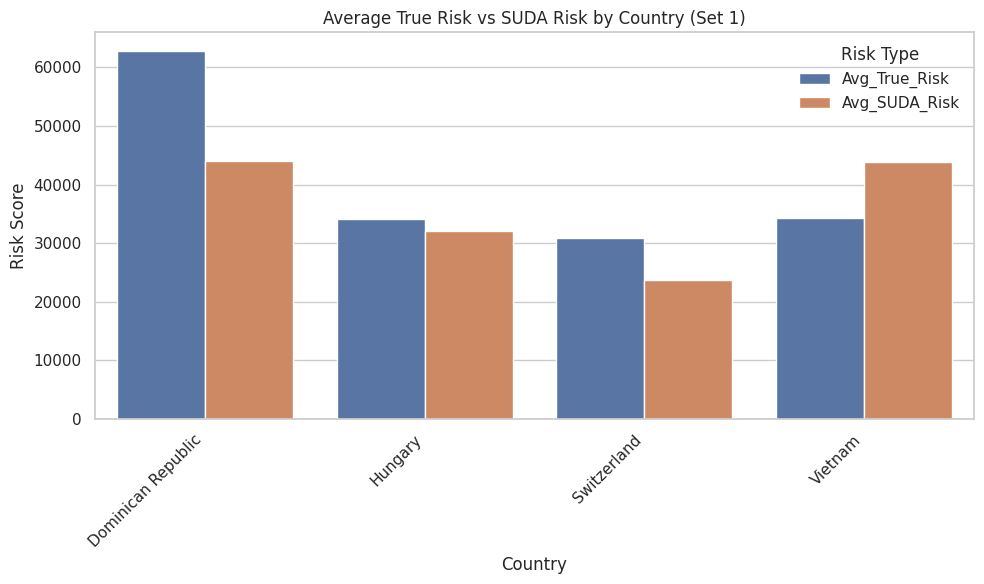

/tmp/ipython-input-2768487511.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_error_country, x="Country", y="Error_%", palette="viridis")


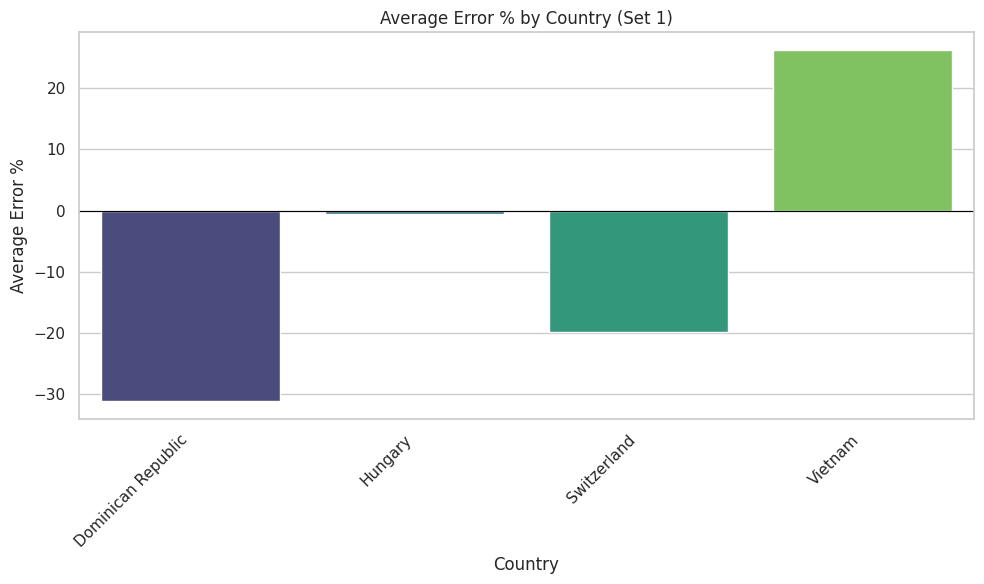

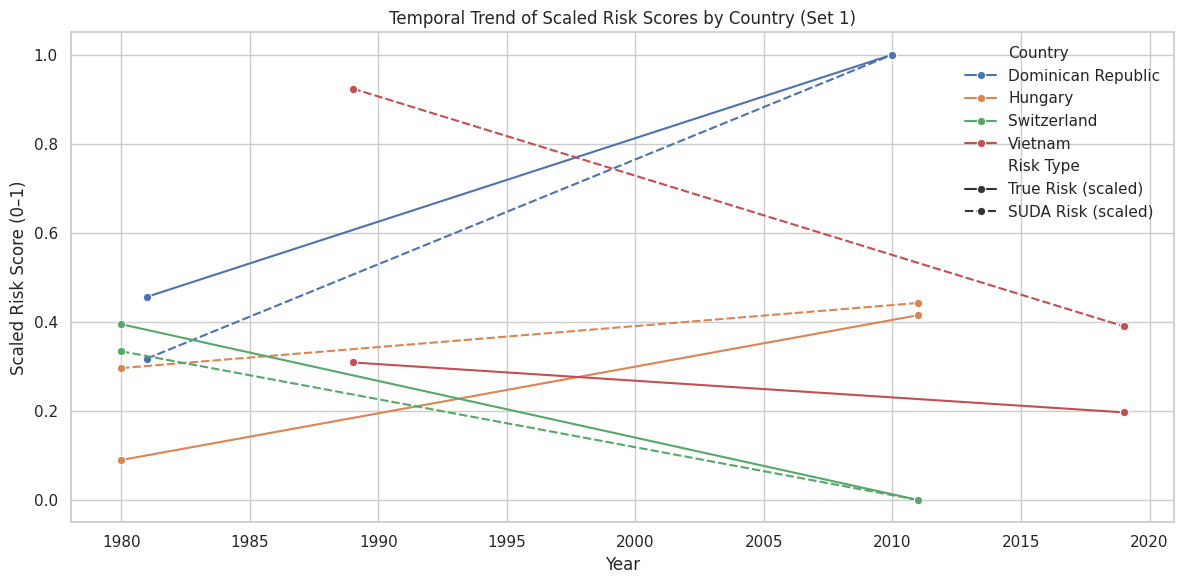

In [30]:
#Summarize Risk Comparison Data

#Display descriptive statistics
print("Descriptive statistics for risk_comparison.csv:")
display(df_risk[["True_Risk", "SUDA_Score", "Error_%"]].describe())

#Visualize Average True Risk vs SUDA Risk by Country
plt.figure(figsize=(10, 6))
avg_risk_country = df_risk.groupby("Country").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean")
).reset_index()
avg_risk_country_melted = avg_risk_country.melt(id_vars="Country", var_name="Risk Type", value_name="Risk Score")
sns.barplot(data=avg_risk_country_melted, x="Country", y="Risk Score", hue="Risk Type")
plt.title("Average True Risk vs SUDA Risk by Country (Set 1)")
plt.ylabel("Risk Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Visualize Average Error % by Country
plt.figure(figsize=(10, 6))
avg_error_country = df_risk.groupby("Country")["Error_%"].mean().reset_index()
sns.barplot(data=avg_error_country, x="Country", y="Error_%", palette="viridis")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Average Error % by Country (Set 1)")
plt.ylabel("Average Error %")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Visualize Temporal Trend of Average Risk Scores by Country
import seaborn as sns
import matplotlib.pyplot as plt

#Temporal averages
avg_risk_temporal = df_risk.groupby(["Country", "Year"]).agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean")
).reset_index()

#Normalization (0–1 scaling across all values)
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())

avg_risk_temporal["Avg_True_Risk_Scaled"] = minmax(avg_risk_temporal["Avg_True_Risk"])
avg_risk_temporal["Avg_SUDA_Risk_Scaled"] = minmax(avg_risk_temporal["Avg_SUDA_Risk"])

#Reshape for plotting
avg_risk_temporal_melted = avg_risk_temporal.melt(
    id_vars=["Country", "Year"],
    value_vars=["Avg_True_Risk_Scaled", "Avg_SUDA_Risk_Scaled"],
    var_name="Risk Type",
    value_name="Scaled Risk Score"
)

#Make labels prettier
avg_risk_temporal_melted["Risk Type"] = avg_risk_temporal_melted["Risk Type"].replace({
    "Avg_True_Risk_Scaled": "True Risk (scaled)",
    "Avg_SUDA_Risk_Scaled": "SUDA Risk (scaled)"
})

#Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_risk_temporal_melted,
    x="Year", y="Scaled Risk Score",
    hue="Country", style="Risk Type", marker="o"
)

plt.title("Temporal Trend of Scaled Risk Scores by Country (Set 1)")
plt.ylabel("Scaled Risk Score (0–1)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

Average Attribute Contribution Across All Country-Years (Set 1):


,Attribute,Contribution_%
0,age,93.066606
3,occ,86.923963
1,edattaind,53.624544
2,marstd,46.011594
4,sex,25.511762


/tmp/ipython-input-1467279423.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_attr_contribution_sorted, x="Attribute", y="Contribution_%", palette="viridis")


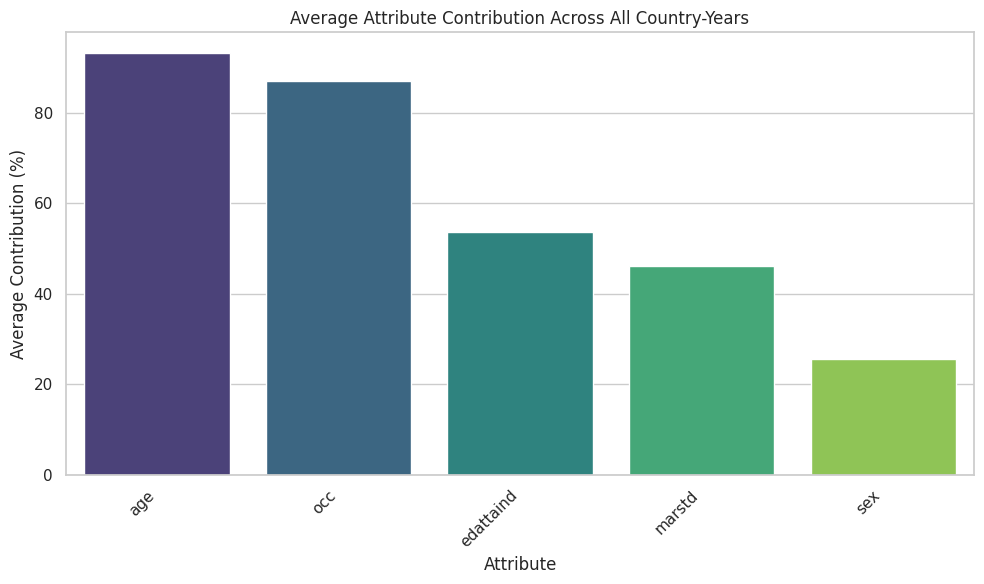


Attribute Contribution - Minimum and Maximum by Attribute:


,min,max
Attribute,,
age,77.0955,99.6054
edattaind,27.3232,90.5837
marstd,23.1524,78.0985
occ,68.6980,92.3655
sex,13.0216,47.7400


In [34]:
#Average contribution for each attribute across all country-years and samples
avg_attr_contribution = attr_df.groupby("Attribute")["Contribution_%"].mean().reset_index()

#Sort for easier identification of most/least contributing
avg_attr_contribution_sorted = avg_attr_contribution.sort_values(by="Contribution_%", ascending=False)

print("Average Attribute Contribution Across All Country-Years (Set 1):")
display(avg_attr_contribution_sorted)

#Visualize the average attribute contributions
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_attr_contribution_sorted, x="Attribute", y="Contribution_%", palette="viridis")
plt.title("Average Attribute Contribution Across All Country-Years")
plt.ylabel("Average Contribution (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAttribute Contribution - Minimum and Maximum by Attribute:")
display(attr_df.groupby("Attribute")["Contribution_%"].agg(['min', 'max']))